# Dynamics of the perceptron 

Variables to fix 

1. $\alpha = \frac{M}{N}$ 
2. $\sigma$ = budget 
3. $\eta$ = Var(budget) 
4. $\bar{p}$ = Average price of the goods 
5. $\Delta$ = $\bar{p^2} - \bar{p}$  :  Fluctuations of the prices around $\bar{p}$. 

A few other variables are required 

6. $\epsilon_{D}$ : Susceptibility of the demand to change based on the production 
7. $\epsilon_{p}$ : Susceptibility of the demand to changes of prices. 


In [2]:
# Fixing the variables 
import numpy as np 
import scipy 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.integrate import quad 
from scipy.optimize import brentq, newton, ridder, bisect
%matplotlib inline 

In [4]:
alpha = 100
N = 100
M = alpha*N
p_bar = 0.0
if (p_bar!=0):
    Delta = 3*p_bar**2
else:
    Delta = 1.0
eta = 0.0
sigma = 1.5
sigma = sigma*(np.sqrt(p_bar**2 + Delta))
eps_D = 0.1
eps_P = 0.1
if (p_bar != 0.0):
    m = 1/np.sqrt(1+(Delta/p_bar**2))
    print m
else: 
    m = 0
tol = 1e-4
step_size = 1e-4
maxiter = 500
print sigma, Delta, m

1.5 1.0 0


In [5]:
#Initialisations 
xi_matrix = np.random.randn(int(M),N)


In [18]:
prices = np.random.normal(p_bar, np.sqrt(Delta),N)
budgets = eta*np.random.randn(int(M))

In [19]:
print np.average(prices), np.std(prices)**2
print p_bar, Delta
print prices.shape

0.20714007099 0.879070105429
0.0 1.0
(100,)


# Main GD loop

In [14]:
alpha_J = compute_alpha_J(sigma, m)
print alpha_J
energy_analytic = 0.50*(1-m**2)*(np.sqrt(alpha/alpha_J) - 1)**2
print energy_analytic

0.309870651714
143.893371055


In [17]:
def compute_rhs(prices, sigma, budgets, p_bar):
    h_mu = ((1.0/np.sqrt(N))*xi_matrix.dot(prices)) - sigma
    temp = np.multiply(h_mu, np.heaviside(-1.0*h_mu, 0.5))
    del_h = (1.0/np.sqrt(N))*temp.dot(xi_matrix)
    A = (-1./N)*np.sum(np.multiply(prices, del_h))
    B = (-1./N)*np.sum(del_h)
    rhs = -1.0*del_h +(1.0/Delta)*(A-B*p_bar)*prices +(1.0/Delta)*(B*p_bar*p_bar - A*p_bar) + B
    return rhs


In [20]:
rhs = compute_rhs(prices, sigma, budgets, p_bar)
print np.linalg.norm(rhs)
iteration_number = 0
energy_list = []
gradient_list = []
step_size = 1e-5
t, d = 0, 1
converge = False 
# while (np.linalg.norm(rhs)> tol) and (iteration_number <= maxiter) :
# while (converge != True): 
# for i in range(1000):
while(np.linalg.norm(rhs) >  tol):
    print "Iteration number {}".format(iteration_number)
    iteration_number +=1 
    h_mu = ((1.0/np.sqrt(N))*xi_matrix.dot(prices)) - sigma
#     print "h_mu {} ".format(np.random.choice(h_mu, size=5))
    energy = 0.5*np.sum(np.square(np.multiply(h_mu, np.heaviside(-1.0*h_mu, 0.5))))
    energy = alpha*energy/M
#     print "energy {}".format(energy) 
    energy_list.append(energy)
#     prices = new_prices[:]
    prices = prices + step_size* rhs 
#     print "Prices {} ".format(np.random.choice(prices, size = 5)) 
    new_rhs = compute_rhs(prices, sigma, budgets, p_bar)
#     converge = True 
#     converge = converge and (np.linalg.norm(new_rhs-rhs) < tol)
#     if np.linalg.norm(new_rhs -rhs) > 1e-4:
#         print "\n\n\n Adjusting step size \n\n\n"
#         print np.linalg.norm(new_rhs), np.linalg.norm(rhs)
#         step_size = step_size/(1+t*d)
#         t +=1
#     if (np.linalg.norm(new_rhs-rhs) < 1e-4):
#         print "\n\n\n Equal norm for gradients \n\n\n" 
#         step_size = step_size*10
    rhs = new_rhs
#     print "Gradient {} ".format(np.random.choice(rhs, size=5))
#     del_h = new_del_h[:]
#     new_del_h = temp_del_h[:]
#     print "Grad_norm, Prices_norm, Avg_price, Std_price Energy {} {} {} {} {} ".format(np.linalg.norm(rhs), np.linalg.norm(prices),
#                                                                              np.average(prices), np.std(prices)**2, energy)
    gradient_list.append(np.linalg.norm(rhs)/N)
    print "Grad_norm, Energy, Step_size ,t {} {} {} {}".format(np.linalg.norm(rhs), energy, step_size, t)

1759.10130102
Iteration number 0
Grad_norm, Energy, Step_size ,t 1753.46609129 155.968930866 1e-05 0
Iteration number 1
Grad_norm, Energy, Step_size ,t 1747.85876021 155.812790615 1e-05 0
Iteration number 2
Grad_norm, Energy, Step_size ,t 1742.27853848 155.657381025 1e-05 0
Iteration number 3
Grad_norm, Energy, Step_size ,t 1736.72401428 155.50269778 1e-05 0
Iteration number 4
Grad_norm, Energy, Step_size ,t 1731.19713052 155.348736762 1e-05 0
Iteration number 5
Grad_norm, Energy, Step_size ,t 1725.69799747 155.195493932 1e-05 0
Iteration number 6
Grad_norm, Energy, Step_size ,t 1720.22458162 155.042965 1e-05 0
Iteration number 7
Grad_norm, Energy, Step_size ,t 1714.77963162 154.891145742 1e-05 0
Iteration number 8
Grad_norm, Energy, Step_size ,t 1709.3618633 154.740032092 1e-05 0
Iteration number 9
Grad_norm, Energy, Step_size ,t 1703.9714309 154.589619632 1e-05 0
Iteration number 10
Grad_norm, Energy, Step_size ,t 1698.60955051 154.439904119 1e-05 0
Iteration number 11
Grad_norm, Ene

Grad_norm, Energy, Step_size ,t 1193.68229385 140.067799232 1e-05 0
Iteration number 136
Grad_norm, Energy, Step_size ,t 1190.6546568 139.980260665 1e-05 0
Iteration number 137
Grad_norm, Energy, Step_size ,t 1187.63971855 139.893065334 1e-05 0
Iteration number 138
Grad_norm, Energy, Step_size ,t 1184.63584044 139.806211441 1e-05 0
Iteration number 139
Grad_norm, Energy, Step_size ,t 1181.64317288 139.71969724 1e-05 0
Iteration number 140
Grad_norm, Energy, Step_size ,t 1178.66048449 139.633521162 1e-05 0
Iteration number 141
Grad_norm, Energy, Step_size ,t 1175.68859117 139.547681652 1e-05 0
Iteration number 142
Grad_norm, Energy, Step_size ,t 1172.72736518 139.462177316 1e-05 0
Iteration number 143
Grad_norm, Energy, Step_size ,t 1169.77634829 139.377006611 1e-05 0
Iteration number 144
Grad_norm, Energy, Step_size ,t 1166.83560798 139.292168057 1e-05 0
Iteration number 145
Grad_norm, Energy, Step_size ,t 1163.90501714 139.207660249 1e-05 0
Iteration number 146
Grad_norm, Energy, Step

Grad_norm, Energy, Step_size ,t 800.932063857 128.75139629 1e-05 0
Iteration number 312
Grad_norm, Energy, Step_size ,t 799.315503094 128.705063086 1e-05 0
Iteration number 313
Grad_norm, Energy, Step_size ,t 797.704264777 128.658883213 1e-05 0
Iteration number 314
Grad_norm, Energy, Step_size ,t 796.098483519 128.612856046 1e-05 0
Iteration number 315
Grad_norm, Energy, Step_size ,t 794.498132313 128.566980917 1e-05 0
Iteration number 316
Grad_norm, Energy, Step_size ,t 792.90236292 128.521257152 1e-05 0
Iteration number 317
Grad_norm, Energy, Step_size ,t 791.31188843 128.475684102 1e-05 0
Iteration number 318
Grad_norm, Energy, Step_size ,t 789.726768927 128.430261173 1e-05 0
Iteration number 319
Grad_norm, Energy, Step_size ,t 788.146978059 128.384987708 1e-05 0
Iteration number 320
Grad_norm, Energy, Step_size ,t 786.572465747 128.339863048 1e-05 0
Iteration number 321
Grad_norm, Energy, Step_size ,t 785.002554507 128.294886538 1e-05 0
Iteration number 322
Grad_norm, Energy, Step_

Grad_norm, Energy, Step_size ,t 576.374852788 122.410872151 1e-05 0
Iteration number 491
Grad_norm, Energy, Step_size ,t 575.410402843 122.384206442 1e-05 0
Iteration number 492
Grad_norm, Energy, Step_size ,t 574.448525147 122.357617294 1e-05 0
Iteration number 493
Grad_norm, Energy, Step_size ,t 573.489209557 122.331104428 1e-05 0
Iteration number 494
Grad_norm, Energy, Step_size ,t 572.532445987 122.304667565 1e-05 0
Iteration number 495
Grad_norm, Energy, Step_size ,t 571.577726452 122.278306428 1e-05 0
Iteration number 496
Grad_norm, Energy, Step_size ,t 570.625140112 122.252020747 1e-05 0
Iteration number 497
Grad_norm, Energy, Step_size ,t 569.67508012 122.225810295 1e-05 0
Iteration number 498
Grad_norm, Energy, Step_size ,t 568.727536571 122.199674818 1e-05 0
Iteration number 499
Grad_norm, Energy, Step_size ,t 567.78249961 122.173614045 1e-05 0
Iteration number 500
Grad_norm, Energy, Step_size ,t 566.839811389 122.147627703 1e-05 0
Iteration number 501
Grad_norm, Energy, Step

Grad_norm, Energy, Step_size ,t 437.679426297 118.675392431 1e-05 0
Iteration number 668
Grad_norm, Energy, Step_size ,t 437.045281031 118.65891003 1e-05 0
Iteration number 669
Grad_norm, Energy, Step_size ,t 436.412466477 118.642470083 1e-05 0
Iteration number 670
Grad_norm, Energy, Step_size ,t 435.780476358 118.626072457 1e-05 0
Iteration number 671
Grad_norm, Energy, Step_size ,t 435.149861817 118.609717035 1e-05 0
Iteration number 672
Grad_norm, Energy, Step_size ,t 434.520618404 118.593403719 1e-05 0
Iteration number 673
Grad_norm, Energy, Step_size ,t 433.892741688 118.577132375 1e-05 0
Iteration number 674
Grad_norm, Energy, Step_size ,t 433.266227257 118.560902874 1e-05 0
Iteration number 675
Grad_norm, Energy, Step_size ,t 432.641070717 118.544715084 1e-05 0
Iteration number 676
Grad_norm, Energy, Step_size ,t 432.017267693 118.528568876 1e-05 0
Iteration number 677
Grad_norm, Energy, Step_size ,t 431.394813829 118.512464121 1e-05 0
Iteration number 678
Grad_norm, Energy, Ste

Grad_norm, Energy, Step_size ,t 342.125851301 116.284912194 1e-05 0
Iteration number 848
Grad_norm, Energy, Step_size ,t 341.682895669 116.27434649 1e-05 0
Iteration number 849
Grad_norm, Energy, Step_size ,t 341.24075121 116.263805826 1e-05 0
Iteration number 850
Grad_norm, Energy, Step_size ,t 340.799415725 116.253290132 1e-05 0
Iteration number 851
Grad_norm, Energy, Step_size ,t 340.35888702 116.24279934 1e-05 0
Iteration number 852
Grad_norm, Energy, Step_size ,t 339.919162913 116.232333381 1e-05 0
Iteration number 853
Grad_norm, Energy, Step_size ,t 339.480241226 116.221892187 1e-05 0
Iteration number 854
Grad_norm, Energy, Step_size ,t 339.042119792 116.21147569 1e-05 0
Iteration number 855
Grad_norm, Energy, Step_size ,t 338.604796449 116.20108382 1e-05 0
Iteration number 856
Grad_norm, Energy, Step_size ,t 338.168269045 116.190716512 1e-05 0
Iteration number 857
Grad_norm, Energy, Step_size ,t 337.732535435 116.180373696 1e-05 0
Iteration number 858
Grad_norm, Energy, Step_siz

Grad_norm, Energy, Step_size ,t 276.940421294 114.799678398 1e-05 0
Iteration number 1018
Grad_norm, Energy, Step_size ,t 276.609187077 114.792535484 1e-05 0
Iteration number 1019
Grad_norm, Energy, Step_size ,t 276.278481631 114.785408556 1e-05 0
Iteration number 1020
Grad_norm, Energy, Step_size ,t 275.948303723 114.778297573 1e-05 0
Iteration number 1021
Grad_norm, Energy, Step_size ,t 275.618652127 114.771202496 1e-05 0
Iteration number 1022
Grad_norm, Energy, Step_size ,t 275.289525619 114.764123284 1e-05 0
Iteration number 1023
Grad_norm, Energy, Step_size ,t 274.96092298 114.757059897 1e-05 0
Iteration number 1024
Grad_norm, Energy, Step_size ,t 274.632842994 114.750012295 1e-05 0
Iteration number 1025
Grad_norm, Energy, Step_size ,t 274.305284448 114.742980439 1e-05 0
Iteration number 1026
Grad_norm, Energy, Step_size ,t 273.978246136 114.73596429 1e-05 0
Iteration number 1027
Grad_norm, Energy, Step_size ,t 273.651726852 114.728963806 1e-05 0
Iteration number 1028
Grad_norm, E

Grad_norm, Energy, Step_size ,t 233.350397656 113.902328779 1e-05 0
Iteration number 1165
Grad_norm, Energy, Step_size ,t 233.085459479 113.897158115 1e-05 0
Iteration number 1166
Grad_norm, Energy, Step_size ,t 232.820904309 113.891998603 1e-05 0
Iteration number 1167
Grad_norm, Energy, Step_size ,t 232.556731357 113.886850218 1e-05 0
Iteration number 1168
Grad_norm, Energy, Step_size ,t 232.292939834 113.881712932 1e-05 0
Iteration number 1169
Grad_norm, Energy, Step_size ,t 232.029528957 113.87658672 1e-05 0
Iteration number 1170
Grad_norm, Energy, Step_size ,t 231.766497943 113.871471555 1e-05 0
Iteration number 1171
Grad_norm, Energy, Step_size ,t 231.503846011 113.866367411 1e-05 0
Iteration number 1172
Grad_norm, Energy, Step_size ,t 231.241572382 113.861274262 1e-05 0
Iteration number 1173
Grad_norm, Energy, Step_size ,t 230.979676282 113.856192082 1e-05 0
Iteration number 1174
Grad_norm, Energy, Step_size ,t 230.718156936 113.851120845 1e-05 0
Iteration number 1175
Grad_norm, 

Grad_norm, Energy, Step_size ,t 191.369087196 113.132248546 1e-05 0
Iteration number 1344
Grad_norm, Energy, Step_size ,t 191.161961871 113.128711796 1e-05 0
Iteration number 1345
Grad_norm, Energy, Step_size ,t 190.95510782 113.125182422 1e-05 0
Iteration number 1346
Grad_norm, Energy, Step_size ,t 190.748524553 113.12166041 1e-05 0
Iteration number 1347
Grad_norm, Energy, Step_size ,t 190.542211585 113.118145742 1e-05 0
Iteration number 1348
Grad_norm, Energy, Step_size ,t 190.33616843 113.114638401 1e-05 0
Iteration number 1349
Grad_norm, Energy, Step_size ,t 190.130394604 113.111138371 1e-05 0
Iteration number 1350
Grad_norm, Energy, Step_size ,t 189.924889625 113.107645636 1e-05 0
Iteration number 1351
Grad_norm, Energy, Step_size ,t 189.71965301 113.10416018 1e-05 0
Iteration number 1352
Grad_norm, Energy, Step_size ,t 189.514684279 113.100681986 1e-05 0
Iteration number 1353
Grad_norm, Energy, Step_size ,t 189.309982953 113.097211037 1e-05 0
Iteration number 1354
Grad_norm, Ener

Grad_norm, Energy, Step_size ,t 159.866894962 112.627424901 1e-05 0
Iteration number 1513
Grad_norm, Energy, Step_size ,t 159.699546977 112.624929166 1e-05 0
Iteration number 1514
Grad_norm, Energy, Step_size ,t 159.532402594 112.622438517 1e-05 0
Iteration number 1515
Grad_norm, Energy, Step_size ,t 159.365461485 112.619952943 1e-05 0
Iteration number 1516
Grad_norm, Energy, Step_size ,t 159.198723325 112.617472432 1e-05 0
Iteration number 1517
Grad_norm, Energy, Step_size ,t 159.03218779 112.614996976 1e-05 0
Iteration number 1518
Grad_norm, Energy, Step_size ,t 158.865854555 112.612526561 1e-05 0
Iteration number 1519
Grad_norm, Energy, Step_size ,t 158.699723298 112.610061178 1e-05 0
Iteration number 1520
Grad_norm, Energy, Step_size ,t 158.533793696 112.607600815 1e-05 0
Iteration number 1521
Grad_norm, Energy, Step_size ,t 158.368065428 112.605145462 1e-05 0
Iteration number 1522
Grad_norm, Energy, Step_size ,t 158.202538171 112.602695108 1e-05 0
Iteration number 1523
Grad_norm, 

Iteration number 1652
Grad_norm, Energy, Step_size ,t 138.283645741 112.322969864 1e-05 0
Iteration number 1653
Grad_norm, Energy, Step_size ,t 138.141926428 112.321090064 1e-05 0
Iteration number 1654
Grad_norm, Energy, Step_size ,t 138.000371325 112.31921404 1e-05 0
Iteration number 1655
Grad_norm, Energy, Step_size ,t 137.858980191 112.317341782 1e-05 0
Iteration number 1656
Grad_norm, Energy, Step_size ,t 137.717752785 112.315473282 1e-05 0
Iteration number 1657
Grad_norm, Energy, Step_size ,t 137.576688867 112.313608533 1e-05 0
Iteration number 1658
Grad_norm, Energy, Step_size ,t 137.435788195 112.311747527 1e-05 0
Iteration number 1659
Grad_norm, Energy, Step_size ,t 137.295050531 112.309890256 1e-05 0
Iteration number 1660
Grad_norm, Energy, Step_size ,t 137.154475636 112.308036712 1e-05 0
Iteration number 1661
Grad_norm, Energy, Step_size ,t 137.01406327 112.306186887 1e-05 0
Iteration number 1662
Grad_norm, Energy, Step_size ,t 136.873813196 112.304340774 1e-05 0
Iteration nu

Grad_norm, Energy, Step_size ,t 119.818744613 112.091808972 1e-05 0
Iteration number 1794
Grad_norm, Energy, Step_size ,t 119.698000704 112.090390619 1e-05 0
Iteration number 1795
Grad_norm, Energy, Step_size ,t 119.577391261 112.08897508 1e-05 0
Iteration number 1796
Grad_norm, Energy, Step_size ,t 119.456916099 112.08756235 1e-05 0
Iteration number 1797
Grad_norm, Energy, Step_size ,t 119.336575035 112.086152422 1e-05 0
Iteration number 1798
Grad_norm, Energy, Step_size ,t 119.216367886 112.084745292 1e-05 0
Iteration number 1799
Grad_norm, Energy, Step_size ,t 119.09629447 112.083340952 1e-05 0
Iteration number 1800
Grad_norm, Energy, Step_size ,t 118.976354605 112.081939398 1e-05 0
Iteration number 1801
Grad_norm, Energy, Step_size ,t 118.856548109 112.080540623 1e-05 0
Iteration number 1802
Grad_norm, Energy, Step_size ,t 118.7368748 112.079144623 1e-05 0
Iteration number 1803
Grad_norm, Energy, Step_size ,t 118.617334497 112.077751391 1e-05 0
Iteration number 1804
Grad_norm, Ener

Grad_norm, Energy, Step_size ,t 103.52599518 111.911789423 1e-05 0
Iteration number 1940
Grad_norm, Energy, Step_size ,t 103.4230998 111.910726537 1e-05 0
Iteration number 1941
Grad_norm, Energy, Step_size ,t 103.320315312 111.909665738 1e-05 0
Iteration number 1942
Grad_norm, Energy, Step_size ,t 103.217641576 111.908607024 1e-05 0
Iteration number 1943
Grad_norm, Energy, Step_size ,t 103.11507845 111.90755039 1e-05 0
Iteration number 1944
Grad_norm, Energy, Step_size ,t 103.012625793 111.906495831 1e-05 0
Iteration number 1945
Grad_norm, Energy, Step_size ,t 102.910283464 111.905443344 1e-05 0
Iteration number 1946
Grad_norm, Energy, Step_size ,t 102.808051323 111.904392924 1e-05 0
Iteration number 1947
Grad_norm, Energy, Step_size ,t 102.705929229 111.903344566 1e-05 0
Iteration number 1948
Grad_norm, Energy, Step_size ,t 102.603917041 111.902298268 1e-05 0
Iteration number 1949
Grad_norm, Energy, Step_size ,t 102.502014621 111.901254024 1e-05 0
Iteration number 1950
Grad_norm, Ener

Grad_norm, Energy, Step_size ,t 89.2574222688 111.773531816 1e-05 0
Iteration number 2090
Grad_norm, Energy, Step_size ,t 89.1697006698 111.772739476 1e-05 0
Iteration number 2091
Grad_norm, Energy, Step_size ,t 89.0820711329 111.771948679 1e-05 0
Iteration number 2092
Grad_norm, Energy, Step_size ,t 88.9945335471 111.771159423 1e-05 0
Iteration number 2093
Grad_norm, Energy, Step_size ,t 88.9070878015 111.770371705 1e-05 0
Iteration number 2094
Grad_norm, Energy, Step_size ,t 88.8197337855 111.769585522 1e-05 0
Iteration number 2095
Grad_norm, Energy, Step_size ,t 88.7324713886 111.76880087 1e-05 0
Iteration number 2096
Grad_norm, Energy, Step_size ,t 88.6453005006 111.768017747 1e-05 0
Iteration number 2097
Grad_norm, Energy, Step_size ,t 88.5582210112 111.76723615 1e-05 0
Iteration number 2098
Grad_norm, Energy, Step_size ,t 88.4712328105 111.766456075 1e-05 0
Iteration number 2099
Grad_norm, Energy, Step_size ,t 88.3843357888 111.76567752 1e-05 0
Iteration number 2100
Grad_norm, En

Grad_norm, Energy, Step_size ,t 75.8782446975 111.661021149 1e-05 0
Iteration number 2256
Grad_norm, Energy, Step_size ,t 75.8044039662 111.660447263 1e-05 0
Iteration number 2257
Grad_norm, Energy, Step_size ,t 75.7306389834 111.659874487 1e-05 0
Iteration number 2258
Grad_norm, Energy, Step_size ,t 75.6569496624 111.659302819 1e-05 0
Iteration number 2259
Grad_norm, Energy, Step_size ,t 75.5833359165 111.658732257 1e-05 0
Iteration number 2260
Grad_norm, Energy, Step_size ,t 75.5097976592 111.658162798 1e-05 0
Iteration number 2261
Grad_norm, Energy, Step_size ,t 75.436334804 111.657594441 1e-05 0
Iteration number 2262
Grad_norm, Energy, Step_size ,t 75.3629472648 111.657027182 1e-05 0
Iteration number 2263
Grad_norm, Energy, Step_size ,t 75.2896349554 111.656461021 1e-05 0
Iteration number 2264
Grad_norm, Energy, Step_size ,t 75.2163977898 111.655895954 1e-05 0
Iteration number 2265
Grad_norm, Energy, Step_size ,t 75.143235682 111.65533198 1e-05 0
Iteration number 2266
Grad_norm, En

Grad_norm, Energy, Step_size ,t 64.7841271777 111.580699329 1e-05 0
Iteration number 2419
Grad_norm, Energy, Step_size ,t 64.7215689807 111.580280357 1e-05 0
Iteration number 2420
Grad_norm, Energy, Step_size ,t 64.6590738635 111.579862191 1e-05 0
Iteration number 2421
Grad_norm, Energy, Step_size ,t 64.5966417569 111.579444829 1e-05 0
Iteration number 2422
Grad_norm, Energy, Step_size ,t 64.5342725913 111.579028269 1e-05 0
Iteration number 2423
Grad_norm, Energy, Step_size ,t 64.4719662975 111.57861251 1e-05 0
Iteration number 2424
Grad_norm, Energy, Step_size ,t 64.4097228065 111.57819755 1e-05 0
Iteration number 2425
Grad_norm, Energy, Step_size ,t 64.3475420491 111.577783388 1e-05 0
Iteration number 2426
Grad_norm, Energy, Step_size ,t 64.2854239563 111.577370022 1e-05 0
Iteration number 2427
Grad_norm, Energy, Step_size ,t 64.2233684592 111.576957451 1e-05 0
Iteration number 2428
Grad_norm, Energy, Step_size ,t 64.1613754891 111.576545672 1e-05 0
Iteration number 2429
Grad_norm, E

Grad_norm, Energy, Step_size ,t 56.0149713287 111.525733145 1e-05 0
Iteration number 2570
Grad_norm, Energy, Step_size ,t 55.9612000967 111.525419615 1e-05 0
Iteration number 2571
Grad_norm, Energy, Step_size ,t 55.9074824116 111.525106686 1e-05 0
Iteration number 2572
Grad_norm, Energy, Step_size ,t 55.8538182162 111.524794355 1e-05 0
Iteration number 2573
Grad_norm, Energy, Step_size ,t 55.8002074533 111.524482622 1e-05 0
Iteration number 2574
Grad_norm, Energy, Step_size ,t 55.7466500656 111.524171485 1e-05 0
Iteration number 2575
Grad_norm, Energy, Step_size ,t 55.6931459964 111.523860944 1e-05 0
Iteration number 2576
Grad_norm, Energy, Step_size ,t 55.6396951884 111.523550997 1e-05 0
Iteration number 2577
Grad_norm, Energy, Step_size ,t 55.5862975848 111.523241643 1e-05 0
Iteration number 2578
Grad_norm, Energy, Step_size ,t 55.5329531289 111.522932881 1e-05 0
Iteration number 2579
Grad_norm, Energy, Step_size ,t 55.4796617638 111.522624709 1e-05 0
Iteration number 2580
Grad_norm,

Grad_norm, Energy, Step_size ,t 48.7033068145 111.485756041 1e-05 0
Iteration number 2716
Grad_norm, Energy, Step_size ,t 48.6567814621 111.485518864 1e-05 0
Iteration number 2717
Grad_norm, Energy, Step_size ,t 48.6103019944 111.485282139 1e-05 0
Iteration number 2718
Grad_norm, Energy, Step_size ,t 48.5638683635 111.485045865 1e-05 0
Iteration number 2719
Grad_norm, Energy, Step_size ,t 48.5174805215 111.484810041 1e-05 0
Iteration number 2720
Grad_norm, Energy, Step_size ,t 48.4711384205 111.484574667 1e-05 0
Iteration number 2721
Grad_norm, Energy, Step_size ,t 48.4248420127 111.484339741 1e-05 0
Iteration number 2722
Grad_norm, Energy, Step_size ,t 48.3785912502 111.484105263 1e-05 0
Iteration number 2723
Grad_norm, Energy, Step_size ,t 48.3323860855 111.483871232 1e-05 0
Iteration number 2724
Grad_norm, Energy, Step_size ,t 48.2862264709 111.483637647 1e-05 0
Iteration number 2725
Grad_norm, Energy, Step_size ,t 48.2401123587 111.483404507 1e-05 0
Iteration number 2726
Grad_norm,

Grad_norm, Energy, Step_size ,t 42.1316535596 111.454426261 1e-05 0
Iteration number 2868
Grad_norm, Energy, Step_size ,t 42.0915828372 111.454248688 1e-05 0
Iteration number 2869
Grad_norm, Energy, Step_size ,t 42.0515513112 111.454071452 1e-05 0
Iteration number 2870
Grad_norm, Energy, Step_size ,t 42.0115589416 111.453894553 1e-05 0
Iteration number 2871
Grad_norm, Energy, Step_size ,t 41.9716056882 111.453717989 1e-05 0
Iteration number 2872
Grad_norm, Energy, Step_size ,t 41.9316915106 111.453541761 1e-05 0
Iteration number 2873
Grad_norm, Energy, Step_size ,t 41.8918163689 111.453365867 1e-05 0
Iteration number 2874
Grad_norm, Energy, Step_size ,t 41.851980223 111.453190307 1e-05 0
Iteration number 2875
Grad_norm, Energy, Step_size ,t 41.8121830329 111.453015081 1e-05 0
Iteration number 2876
Grad_norm, Energy, Step_size ,t 41.7724247586 111.452840187 1e-05 0
Iteration number 2877
Grad_norm, Energy, Step_size ,t 41.7327053601 111.452665625 1e-05 0
Iteration number 2878
Grad_norm, 

Grad_norm, Energy, Step_size ,t 36.2961536459 111.430295191 1e-05 0
Iteration number 3025
Grad_norm, Energy, Step_size ,t 36.2617713457 111.430163359 1e-05 0
Iteration number 3026
Grad_norm, Energy, Step_size ,t 36.227422445 111.430031777 1e-05 0
Iteration number 3027
Grad_norm, Energy, Step_size ,t 36.1931069099 111.429900443 1e-05 0
Iteration number 3028
Grad_norm, Energy, Step_size ,t 36.1588247068 111.429769358 1e-05 0
Iteration number 3029
Grad_norm, Energy, Step_size ,t 36.124575802 111.429638521 1e-05 0
Iteration number 3030
Grad_norm, Energy, Step_size ,t 36.0903601617 111.429507931 1e-05 0
Iteration number 3031
Grad_norm, Energy, Step_size ,t 36.0561777523 111.429377589 1e-05 0
Iteration number 3032
Grad_norm, Energy, Step_size ,t 36.0220285402 111.429247493 1e-05 0
Iteration number 3033
Grad_norm, Energy, Step_size ,t 35.9879124919 111.429117643 1e-05 0
Iteration number 3034
Grad_norm, Energy, Step_size ,t 35.9538295738 111.428988039 1e-05 0
Iteration number 3035
Grad_norm, E

Grad_norm, Energy, Step_size ,t 31.1392682101 111.41188333 1e-05 0
Iteration number 3187
Grad_norm, Energy, Step_size ,t 31.1098805144 111.411786278 1e-05 0
Iteration number 3188
Grad_norm, Energy, Step_size ,t 31.0805211965 111.411689408 1e-05 0
Iteration number 3189
Grad_norm, Energy, Step_size ,t 31.051190228 111.411592722 1e-05 0
Iteration number 3190
Grad_norm, Energy, Step_size ,t 31.0218875805 111.411496217 1e-05 0
Iteration number 3191
Grad_norm, Energy, Step_size ,t 30.9926132258 111.411399895 1e-05 0
Iteration number 3192
Grad_norm, Energy, Step_size ,t 30.9633671356 111.411303754 1e-05 0
Iteration number 3193
Grad_norm, Energy, Step_size ,t 30.9341492816 111.411207794 1e-05 0
Iteration number 3194
Grad_norm, Energy, Step_size ,t 30.9049596357 111.411112016 1e-05 0
Iteration number 3195
Grad_norm, Energy, Step_size ,t 30.8757981696 111.411016418 1e-05 0
Iteration number 3196
Grad_norm, Energy, Step_size ,t 30.8466648553 111.410921 1e-05 0
Iteration number 3197
Grad_norm, Ener

Grad_norm, Energy, Step_size ,t 27.160718991 111.399559016 1e-05 0
Iteration number 3332
Grad_norm, Energy, Step_size ,t 27.135164403 111.399485171 1e-05 0
Iteration number 3333
Grad_norm, Energy, Step_size ,t 27.1096343787 111.399411466 1e-05 0
Iteration number 3334
Grad_norm, Energy, Step_size ,t 27.0841288937 111.399337898 1e-05 0
Iteration number 3335
Grad_norm, Energy, Step_size ,t 27.0586479236 111.399264469 1e-05 0
Iteration number 3336
Grad_norm, Energy, Step_size ,t 27.0331914443 111.399191178 1e-05 0
Iteration number 3337
Grad_norm, Energy, Step_size ,t 27.0077594315 111.399118025 1e-05 0
Iteration number 3338
Grad_norm, Energy, Step_size ,t 26.9823518609 111.399045009 1e-05 0
Iteration number 3339
Grad_norm, Energy, Step_size ,t 26.9569687082 111.398972131 1e-05 0
Iteration number 3340
Grad_norm, Energy, Step_size ,t 26.9316099495 111.39889939 1e-05 0
Iteration number 3341
Grad_norm, Energy, Step_size ,t 26.9062755603 111.398826785 1e-05 0
Iteration number 3342
Grad_norm, En

Grad_norm, Energy, Step_size ,t 23.7223287103 111.390234679 1e-05 0
Iteration number 3476
Grad_norm, Energy, Step_size ,t 23.7000726281 111.390178344 1e-05 0
Iteration number 3477
Grad_norm, Energy, Step_size ,t 23.6778378532 111.390122115 1e-05 0
Iteration number 3478
Grad_norm, Energy, Step_size ,t 23.6556243647 111.390065991 1e-05 0
Iteration number 3479
Grad_norm, Energy, Step_size ,t 23.6334321417 111.390009972 1e-05 0
Iteration number 3480
Grad_norm, Energy, Step_size ,t 23.6112611632 111.389954058 1e-05 0
Iteration number 3481
Grad_norm, Energy, Step_size ,t 23.5891114083 111.38989825 1e-05 0
Iteration number 3482
Grad_norm, Energy, Step_size ,t 23.5669828562 111.389842546 1e-05 0
Iteration number 3483
Grad_norm, Energy, Step_size ,t 23.544875486 111.389786946 1e-05 0
Iteration number 3484
Grad_norm, Energy, Step_size ,t 23.5227892769 111.38973145 1e-05 0
Iteration number 3485
Grad_norm, Energy, Step_size ,t 23.5007242081 111.389676059 1e-05 0
Iteration number 3486
Grad_norm, En

Grad_norm, Energy, Step_size ,t 20.9023549443 111.383509579 1e-05 0
Iteration number 3611
Grad_norm, Energy, Step_size ,t 20.8827941089 111.383465841 1e-05 0
Iteration number 3612
Grad_norm, Energy, Step_size ,t 20.863251937 111.383422184 1e-05 0
Iteration number 3613
Grad_norm, Energy, Step_size ,t 20.8437284104 111.383378609 1e-05 0
Iteration number 3614
Grad_norm, Energy, Step_size ,t 20.8242235107 111.383335115 1e-05 0
Iteration number 3615
Grad_norm, Energy, Step_size ,t 20.8047372199 111.383291703 1e-05 0
Iteration number 3616
Grad_norm, Energy, Step_size ,t 20.7852695196 111.383248372 1e-05 0
Iteration number 3617
Grad_norm, Energy, Step_size ,t 20.7658203917 111.383205122 1e-05 0
Iteration number 3618
Grad_norm, Energy, Step_size ,t 20.7463898181 111.383161953 1e-05 0
Iteration number 3619
Grad_norm, Energy, Step_size ,t 20.7269777805 111.383118864 1e-05 0
Iteration number 3620
Grad_norm, Energy, Step_size ,t 20.7075842609 111.383075856 1e-05 0
Iteration number 3621
Grad_norm, 

Grad_norm, Energy, Step_size ,t 18.4061725297 111.378252704 1e-05 0
Iteration number 3747
Grad_norm, Energy, Step_size ,t 18.3889896836 111.378218788 1e-05 0
Iteration number 3748
Grad_norm, Energy, Step_size ,t 18.3718231806 111.378184936 1e-05 0
Iteration number 3749
Grad_norm, Energy, Step_size ,t 18.3546730048 111.378151146 1e-05 0
Iteration number 3750
Grad_norm, Energy, Step_size ,t 18.3375391403 111.37811742 1e-05 0
Iteration number 3751
Grad_norm, Energy, Step_size ,t 18.3204215712 111.378083757 1e-05 0
Iteration number 3752
Grad_norm, Energy, Step_size ,t 18.3033202817 111.378050156 1e-05 0
Iteration number 3753
Grad_norm, Energy, Step_size ,t 18.2862352559 111.378016618 1e-05 0
Iteration number 3754
Grad_norm, Energy, Step_size ,t 18.269166478 111.377983143 1e-05 0
Iteration number 3755
Grad_norm, Energy, Step_size ,t 18.2521139321 111.37794973 1e-05 0
Iteration number 3756
Grad_norm, Energy, Step_size ,t 18.2350776025 111.377916379 1e-05 0
Iteration number 3757
Grad_norm, En

Grad_norm, Energy, Step_size ,t 16.0776399116 111.373940169 1e-05 0
Iteration number 3892
Grad_norm, Energy, Step_size ,t 16.0626684117 111.373914291 1e-05 0
Iteration number 3893
Grad_norm, Energy, Step_size ,t 16.0477111073 111.373888462 1e-05 0
Iteration number 3894
Grad_norm, Energy, Step_size ,t 16.0327679846 111.373862682 1e-05 0
Iteration number 3895
Grad_norm, Energy, Step_size ,t 16.0178390299 111.373836949 1e-05 0
Iteration number 3896
Grad_norm, Energy, Step_size ,t 16.0029242294 111.373811264 1e-05 0
Iteration number 3897
Grad_norm, Energy, Step_size ,t 15.9880235694 111.373785626 1e-05 0
Iteration number 3898
Grad_norm, Energy, Step_size ,t 15.9731370363 111.373760037 1e-05 0
Iteration number 3899
Grad_norm, Energy, Step_size ,t 15.9582646163 111.373734495 1e-05 0
Iteration number 3900
Grad_norm, Energy, Step_size ,t 15.9434062957 111.373709001 1e-05 0
Iteration number 3901
Grad_norm, Energy, Step_size ,t 15.928562061 111.373683554 1e-05 0
Iteration number 3902
Grad_norm, 

Grad_norm, Energy, Step_size ,t 14.1795465994 111.370848365 1e-05 0
Iteration number 4027
Grad_norm, Energy, Step_size ,t 14.1663723958 111.370828237 1e-05 0
Iteration number 4028
Grad_norm, Energy, Step_size ,t 14.1532106493 111.370808147 1e-05 0
Iteration number 4029
Grad_norm, Energy, Step_size ,t 14.140061348 111.370788094 1e-05 0
Iteration number 4030
Grad_norm, Energy, Step_size ,t 14.1269244799 111.370768079 1e-05 0
Iteration number 4031
Grad_norm, Energy, Step_size ,t 14.1138000329 111.370748101 1e-05 0
Iteration number 4032
Grad_norm, Energy, Step_size ,t 14.1006879951 111.370728159 1e-05 0
Iteration number 4033
Grad_norm, Energy, Step_size ,t 14.0875883544 111.370708255 1e-05 0
Iteration number 4034
Grad_norm, Energy, Step_size ,t 14.074501099 111.370688388 1e-05 0
Iteration number 4035
Grad_norm, Energy, Step_size ,t 14.0614262169 111.370668558 1e-05 0
Iteration number 4036
Grad_norm, Energy, Step_size ,t 14.0483636961 111.370648764 1e-05 0
Iteration number 4037
Grad_norm, E

Grad_norm, Energy, Step_size ,t 12.3935607487 111.368287565 1e-05 0
Iteration number 4172
Grad_norm, Energy, Step_size ,t 12.3820730204 111.368272189 1e-05 0
Iteration number 4173
Grad_norm, Energy, Step_size ,t 12.3705961244 111.368256841 1e-05 0
Iteration number 4174
Grad_norm, Energy, Step_size ,t 12.3591300501 111.368241522 1e-05 0
Iteration number 4175
Grad_norm, Energy, Step_size ,t 12.3476747871 111.368226231 1e-05 0
Iteration number 4176
Grad_norm, Energy, Step_size ,t 12.3362303251 111.368210969 1e-05 0
Iteration number 4177
Grad_norm, Energy, Step_size ,t 12.3247966536 111.368195735 1e-05 0
Iteration number 4178
Grad_norm, Energy, Step_size ,t 12.3133737623 111.368180529 1e-05 0
Iteration number 4179
Grad_norm, Energy, Step_size ,t 12.3019616408 111.368165351 1e-05 0
Iteration number 4180
Grad_norm, Energy, Step_size ,t 12.2905602788 111.368150202 1e-05 0
Iteration number 4181
Grad_norm, Energy, Step_size ,t 12.2791696658 111.36813508 1e-05 0
Iteration number 4182
Grad_norm, 

Grad_norm, Energy, Step_size ,t 10.9366491169 111.366449443 1e-05 0
Iteration number 4307
Grad_norm, Energy, Step_size ,t 10.9265334826 111.36643747 1e-05 0
Iteration number 4308
Grad_norm, Energy, Step_size ,t 10.916427363 111.366425519 1e-05 0
Iteration number 4309
Grad_norm, Energy, Step_size ,t 10.9063307487 111.36641359 1e-05 0
Iteration number 4310
Grad_norm, Energy, Step_size ,t 10.8962436308 111.366401684 1e-05 0
Iteration number 4311
Grad_norm, Energy, Step_size ,t 10.8861660001 111.366389799 1e-05 0
Iteration number 4312
Grad_norm, Energy, Step_size ,t 10.8760978476 111.366377936 1e-05 0
Iteration number 4313
Grad_norm, Energy, Step_size ,t 10.866039164 111.366366095 1e-05 0
Iteration number 4314
Grad_norm, Energy, Step_size ,t 10.8559899404 111.366354276 1e-05 0
Iteration number 4315
Grad_norm, Energy, Step_size ,t 10.8459501677 111.366342479 1e-05 0
Iteration number 4316
Grad_norm, Energy, Step_size ,t 10.8359198369 111.366330703 1e-05 0
Iteration number 4317
Grad_norm, Ene

Grad_norm, Energy, Step_size ,t 9.6535551123 111.365017758 1e-05 0
Iteration number 4442
Grad_norm, Energy, Step_size ,t 9.64464490616 111.36500843 1e-05 0
Iteration number 4443
Grad_norm, Energy, Step_size ,t 9.63574306054 111.364999119 1e-05 0
Iteration number 4444
Grad_norm, Energy, Step_size ,t 9.62684956745 111.364989825 1e-05 0
Iteration number 4445
Grad_norm, Energy, Step_size ,t 9.61796441889 111.364980549 1e-05 0
Iteration number 4446
Grad_norm, Energy, Step_size ,t 9.60908760691 111.364971289 1e-05 0
Iteration number 4447
Grad_norm, Energy, Step_size ,t 9.60021912351 111.364962046 1e-05 0
Iteration number 4448
Grad_norm, Energy, Step_size ,t 9.59135896075 111.364952821 1e-05 0
Iteration number 4449
Grad_norm, Energy, Step_size ,t 9.58250711067 111.364943613 1e-05 0
Iteration number 4450
Grad_norm, Energy, Step_size ,t 9.57366356533 111.364934421 1e-05 0
Iteration number 4451
Grad_norm, Energy, Step_size ,t 9.56482831679 111.364925247 1e-05 0
Iteration number 4452
Grad_norm, E

Grad_norm, Energy, Step_size ,t 8.17708555866 111.363587756 1e-05 0
Iteration number 4622
Grad_norm, Energy, Step_size ,t 8.16955863685 111.363581064 1e-05 0
Iteration number 4623
Grad_norm, Energy, Step_size ,t 8.16203875561 111.363574383 1e-05 0
Iteration number 4624
Grad_norm, Energy, Step_size ,t 8.15452590824 111.363567715 1e-05 0
Iteration number 4625
Grad_norm, Energy, Step_size ,t 8.14702008803 111.363561059 1e-05 0
Iteration number 4626
Grad_norm, Energy, Step_size ,t 8.13952128829 111.363554415 1e-05 0
Iteration number 4627
Grad_norm, Energy, Step_size ,t 8.13202950234 111.363547784 1e-05 0
Iteration number 4628
Grad_norm, Energy, Step_size ,t 8.1245447235 111.363541165 1e-05 0
Iteration number 4629
Grad_norm, Energy, Step_size ,t 8.1170669451 111.363534558 1e-05 0
Iteration number 4630
Grad_norm, Energy, Step_size ,t 8.10959616046 111.363527963 1e-05 0
Iteration number 4631
Grad_norm, Energy, Step_size ,t 8.10213236293 111.36352138 1e-05 0
Iteration number 4632
Grad_norm, En

Grad_norm, Energy, Step_size ,t 6.92952004931 111.362561337 1e-05 0
Iteration number 4802
Grad_norm, Energy, Step_size ,t 6.92315837082 111.36255653 1e-05 0
Iteration number 4803
Grad_norm, Energy, Step_size ,t 6.916802625 111.362551733 1e-05 0
Iteration number 4804
Grad_norm, Energy, Step_size ,t 6.91045280622 111.362546945 1e-05 0
Iteration number 4805
Grad_norm, Energy, Step_size ,t 6.90410890885 111.362542165 1e-05 0
Iteration number 4806
Grad_norm, Energy, Step_size ,t 6.89777092727 111.362537394 1e-05 0
Iteration number 4807
Grad_norm, Energy, Step_size ,t 6.89143885587 111.362532632 1e-05 0
Iteration number 4808
Grad_norm, Energy, Step_size ,t 6.88511268903 111.362527878 1e-05 0
Iteration number 4809
Grad_norm, Energy, Step_size ,t 6.87879242116 111.362523133 1e-05 0
Iteration number 4810
Grad_norm, Energy, Step_size ,t 6.87247804666 111.362518397 1e-05 0
Iteration number 4811
Grad_norm, Energy, Step_size ,t 6.86616955993 111.36251367 1e-05 0
Iteration number 4812
Grad_norm, Ene

Grad_norm, Energy, Step_size ,t 6.01096137652 111.361912398 1e-05 0
Iteration number 4957
Grad_norm, Energy, Step_size ,t 6.00545525635 111.361908782 1e-05 0
Iteration number 4958
Grad_norm, Energy, Step_size ,t 5.99995425798 111.361905172 1e-05 0
Iteration number 4959
Grad_norm, Energy, Step_size ,t 5.99445837658 111.361901569 1e-05 0
Iteration number 4960
Grad_norm, Energy, Step_size ,t 5.98896760729 111.361897973 1e-05 0
Iteration number 4961
Grad_norm, Energy, Step_size ,t 5.98348194528 111.361894383 1e-05 0
Iteration number 4962
Grad_norm, Energy, Step_size ,t 5.97800138573 111.361890799 1e-05 0
Iteration number 4963
Grad_norm, Energy, Step_size ,t 5.97252592379 111.361887222 1e-05 0
Iteration number 4964
Grad_norm, Energy, Step_size ,t 5.96705555465 111.361883652 1e-05 0
Iteration number 4965
Grad_norm, Energy, Step_size ,t 5.96159027348 111.361880089 1e-05 0
Iteration number 4966
Grad_norm, Energy, Step_size ,t 5.95613007548 111.361876531 1e-05 0
Iteration number 4967
Grad_norm,

Grad_norm, Energy, Step_size ,t 5.14004718041 111.361380997 1e-05 0
Iteration number 5128
Grad_norm, Energy, Step_size ,t 5.135350113 111.361378352 1e-05 0
Iteration number 5129
Grad_norm, Energy, Step_size ,t 5.13065740289 111.361375713 1e-05 0
Iteration number 5130
Grad_norm, Energy, Step_size ,t 5.12596904598 111.361373078 1e-05 0
Iteration number 5131
Grad_norm, Energy, Step_size ,t 5.12128503816 111.361370449 1e-05 0
Iteration number 5132
Grad_norm, Energy, Step_size ,t 5.11660537533 111.361367824 1e-05 0
Iteration number 5133
Grad_norm, Energy, Step_size ,t 5.11193005339 111.361365203 1e-05 0
Iteration number 5134
Grad_norm, Energy, Step_size ,t 5.10725906824 111.361362588 1e-05 0
Iteration number 5135
Grad_norm, Energy, Step_size ,t 5.10259241579 111.361359977 1e-05 0
Iteration number 5136
Grad_norm, Energy, Step_size ,t 5.09793009195 111.361357372 1e-05 0
Iteration number 5137
Grad_norm, Energy, Step_size ,t 5.09327209265 111.361354771 1e-05 0
Iteration number 5138
Grad_norm, E

Grad_norm, Energy, Step_size ,t 4.38093548754 111.360984583 1e-05 0
Iteration number 5303
Grad_norm, Energy, Step_size ,t 4.37694168914 111.360982662 1e-05 0
Iteration number 5304
Grad_norm, Energy, Step_size ,t 4.37295158556 111.360980745 1e-05 0
Iteration number 5305
Grad_norm, Energy, Step_size ,t 4.3689651733 111.360978831 1e-05 0
Iteration number 5306
Grad_norm, Energy, Step_size ,t 4.36498244891 111.360976921 1e-05 0
Iteration number 5307
Grad_norm, Energy, Step_size ,t 4.36100340891 111.360975014 1e-05 0
Iteration number 5308
Grad_norm, Energy, Step_size ,t 4.35702804984 111.36097311 1e-05 0
Iteration number 5309
Grad_norm, Energy, Step_size ,t 4.35305636823 111.36097121 1e-05 0
Iteration number 5310
Grad_norm, Energy, Step_size ,t 4.34908836063 111.360969314 1e-05 0
Iteration number 5311
Grad_norm, Energy, Step_size ,t 4.34512402358 111.360967421 1e-05 0
Iteration number 5312
Grad_norm, Energy, Step_size ,t 4.34116335363 111.360965531 1e-05 0
Iteration number 5313
Grad_norm, En

Grad_norm, Energy, Step_size ,t 3.70151231239 111.360682667 1e-05 0
Iteration number 5488
Grad_norm, Energy, Step_size ,t 3.69814621443 111.360681295 1e-05 0
Iteration number 5489
Grad_norm, Energy, Step_size ,t 3.69478322181 111.360679927 1e-05 0
Iteration number 5490
Grad_norm, Energy, Step_size ,t 3.69142333161 111.360678561 1e-05 0
Iteration number 5491
Grad_norm, Energy, Step_size ,t 3.68806654093 111.360677197 1e-05 0
Iteration number 5492
Grad_norm, Energy, Step_size ,t 3.68471284685 111.360675836 1e-05 0
Iteration number 5493
Grad_norm, Energy, Step_size ,t 3.68136224648 111.360674477 1e-05 0
Iteration number 5494
Grad_norm, Energy, Step_size ,t 3.67801473692 111.36067312 1e-05 0
Iteration number 5495
Grad_norm, Energy, Step_size ,t 3.67467031526 111.360671767 1e-05 0
Iteration number 5496
Grad_norm, Energy, Step_size ,t 3.67132897861 111.360670415 1e-05 0
Iteration number 5497
Grad_norm, Energy, Step_size ,t 3.66799072408 111.360669066 1e-05 0
Iteration number 5498
Grad_norm, 

Grad_norm, Energy, Step_size ,t 3.22681802218 111.360501446 1e-05 0
Iteration number 5639
Grad_norm, Energy, Step_size ,t 3.22388936571 111.360500404 1e-05 0
Iteration number 5640
Grad_norm, Energy, Step_size ,t 3.22096340495 111.360499363 1e-05 0
Iteration number 5641
Grad_norm, Energy, Step_size ,t 3.21804013738 111.360498325 1e-05 0
Iteration number 5642
Grad_norm, Energy, Step_size ,t 3.21511956047 111.360497289 1e-05 0
Iteration number 5643
Grad_norm, Energy, Step_size ,t 3.21220167172 111.360496254 1e-05 0
Iteration number 5644
Grad_norm, Energy, Step_size ,t 3.2092864686 111.360495222 1e-05 0
Iteration number 5645
Grad_norm, Energy, Step_size ,t 3.2063739486 111.360494191 1e-05 0
Iteration number 5646
Grad_norm, Energy, Step_size ,t 3.20346410923 111.360493162 1e-05 0
Iteration number 5647
Grad_norm, Energy, Step_size ,t 3.20055694796 111.360492135 1e-05 0
Iteration number 5648
Grad_norm, Energy, Step_size ,t 3.1976524623 111.36049111 1e-05 0
Iteration number 5649
Grad_norm, Ene

Grad_norm, Energy, Step_size ,t 2.84709941458 111.360374124 1e-05 0
Iteration number 5777
Grad_norm, Energy, Step_size ,t 2.84451992982 111.360373313 1e-05 0
Iteration number 5778
Grad_norm, Energy, Step_size ,t 2.84194281458 111.360372503 1e-05 0
Iteration number 5779
Grad_norm, Energy, Step_size ,t 2.83936806665 111.360371695 1e-05 0
Iteration number 5780
Grad_norm, Energy, Step_size ,t 2.83679568382 111.360370888 1e-05 0
Iteration number 5781
Grad_norm, Energy, Step_size ,t 2.83422566389 111.360370083 1e-05 0
Iteration number 5782
Grad_norm, Energy, Step_size ,t 2.83165800465 111.360369279 1e-05 0
Iteration number 5783
Grad_norm, Energy, Step_size ,t 2.8290927039 111.360368477 1e-05 0
Iteration number 5784
Grad_norm, Energy, Step_size ,t 2.82652975944 111.360367676 1e-05 0
Iteration number 5785
Grad_norm, Energy, Step_size ,t 2.82396916906 111.360366876 1e-05 0
Iteration number 5786
Grad_norm, Energy, Step_size ,t 2.82141093058 111.360366078 1e-05 0
Iteration number 5787
Grad_norm, 

Iteration number 5939
Grad_norm, Energy, Step_size ,t 2.4564193097 111.360259529 1e-05 0
Iteration number 5940
Grad_norm, Energy, Step_size ,t 2.45419829732 111.360258925 1e-05 0
Iteration number 5941
Grad_norm, Energy, Step_size ,t 2.4519793204 111.360258322 1e-05 0
Iteration number 5942
Grad_norm, Energy, Step_size ,t 2.44976237705 111.360257721 1e-05 0
Iteration number 5943
Grad_norm, Energy, Step_size ,t 2.44754746539 111.36025712 1e-05 0
Iteration number 5944
Grad_norm, Energy, Step_size ,t 2.44533458351 111.360256521 1e-05 0
Iteration number 5945
Grad_norm, Energy, Step_size ,t 2.44312372953 111.360255922 1e-05 0
Iteration number 5946
Grad_norm, Energy, Step_size ,t 2.44091490157 111.360255325 1e-05 0
Iteration number 5947
Grad_norm, Energy, Step_size ,t 2.43870809773 111.360254729 1e-05 0
Iteration number 5948
Grad_norm, Energy, Step_size ,t 2.43650331614 111.360254133 1e-05 0
Iteration number 5949
Grad_norm, Energy, Step_size ,t 2.43430055492 111.360253539 1e-05 0
Iteration num

Grad_norm, Energy, Step_size ,t 2.1047204104 111.360170627 1e-05 0
Iteration number 6111
Grad_norm, Energy, Step_size ,t 2.10282134055 111.360170184 1e-05 0
Iteration number 6112
Grad_norm, Energy, Step_size ,t 2.10092400695 111.360169741 1e-05 0
Iteration number 6113
Grad_norm, Energy, Step_size ,t 2.099028408 111.3601693 1e-05 0
Iteration number 6114
Grad_norm, Energy, Step_size ,t 2.09713454207 111.360168859 1e-05 0
Iteration number 6115
Grad_norm, Energy, Step_size ,t 2.09524240758 111.360168419 1e-05 0
Iteration number 6116
Grad_norm, Energy, Step_size ,t 2.0933520029 111.360167979 1e-05 0
Iteration number 6117
Grad_norm, Energy, Step_size ,t 2.09146332643 111.360167541 1e-05 0
Iteration number 6118
Grad_norm, Energy, Step_size ,t 2.08957637657 111.360167103 1e-05 0
Iteration number 6119
Grad_norm, Energy, Step_size ,t 2.08769115171 111.360166666 1e-05 0
Iteration number 6120
Grad_norm, Energy, Step_size ,t 2.08580765026 111.36016623 1e-05 0
Iteration number 6121
Grad_norm, Energy

Grad_norm, Energy, Step_size ,t 1.79907839969 111.360104366 1e-05 0
Iteration number 6285
Grad_norm, Energy, Step_size ,t 1.79745844471 111.360104042 1e-05 0
Iteration number 6286
Grad_norm, Energy, Step_size ,t 1.79583996729 111.360103719 1e-05 0
Iteration number 6287
Grad_norm, Energy, Step_size ,t 1.79422296604 111.360103396 1e-05 0
Iteration number 6288
Grad_norm, Energy, Step_size ,t 1.7926074396 111.360103074 1e-05 0
Iteration number 6289
Grad_norm, Energy, Step_size ,t 1.79099338661 111.360102752 1e-05 0
Iteration number 6290
Grad_norm, Energy, Step_size ,t 1.78938080571 111.360102431 1e-05 0
Iteration number 6291
Grad_norm, Energy, Step_size ,t 1.78776969553 111.360102111 1e-05 0
Iteration number 6292
Grad_norm, Energy, Step_size ,t 1.78616005471 111.360101791 1e-05 0
Iteration number 6293
Grad_norm, Energy, Step_size ,t 1.78455188188 111.360101472 1e-05 0
Iteration number 6294
Grad_norm, Energy, Step_size ,t 1.7829451757 111.360101153 1e-05 0
Iteration number 6295
Grad_norm, E

Iteration number 6437
Grad_norm, Energy, Step_size ,t 1.56763322839 111.360061011 1e-05 0
Iteration number 6438
Grad_norm, Energy, Step_size ,t 1.56622416237 111.360060765 1e-05 0
Iteration number 6439
Grad_norm, Energy, Step_size ,t 1.56481637892 111.360060519 1e-05 0
Iteration number 6440
Grad_norm, Energy, Step_size ,t 1.56340987685 111.360060274 1e-05 0
Iteration number 6441
Grad_norm, Energy, Step_size ,t 1.56200465499 111.36006003 1e-05 0
Iteration number 6442
Grad_norm, Energy, Step_size ,t 1.56060071215 111.360059786 1e-05 0
Iteration number 6443
Grad_norm, Energy, Step_size ,t 1.55919804714 111.360059542 1e-05 0
Iteration number 6444
Grad_norm, Energy, Step_size ,t 1.5577966588 111.360059299 1e-05 0
Iteration number 6445
Grad_norm, Energy, Step_size ,t 1.55639654593 111.360059056 1e-05 0
Iteration number 6446
Grad_norm, Energy, Step_size ,t 1.55499770737 111.360058813 1e-05 0
Iteration number 6447
Grad_norm, Energy, Step_size ,t 1.55360014194 111.360058571 1e-05 0
Iteration nu

Grad_norm, Energy, Step_size ,t 1.34198128456 111.360024413 1e-05 0
Iteration number 6611
Grad_norm, Energy, Step_size ,t 1.34077738765 111.360024232 1e-05 0
Iteration number 6612
Grad_norm, Energy, Step_size ,t 1.33957458409 111.360024052 1e-05 0
Iteration number 6613
Grad_norm, Energy, Step_size ,t 1.33837287287 111.360023873 1e-05 0
Iteration number 6614
Grad_norm, Energy, Step_size ,t 1.33717225298 111.360023694 1e-05 0
Iteration number 6615
Grad_norm, Energy, Step_size ,t 1.33597272342 111.360023515 1e-05 0
Iteration number 6616
Grad_norm, Energy, Step_size ,t 1.33477428318 111.360023336 1e-05 0
Iteration number 6617
Grad_norm, Energy, Step_size ,t 1.33357693127 111.360023158 1e-05 0
Iteration number 6618
Grad_norm, Energy, Step_size ,t 1.33238066667 111.36002298 1e-05 0
Iteration number 6619
Grad_norm, Energy, Step_size ,t 1.33118548839 111.360022802 1e-05 0
Iteration number 6620
Grad_norm, Energy, Step_size ,t 1.32999139543 111.360022625 1e-05 0
Iteration number 6621
Grad_norm, 

Grad_norm, Energy, Step_size ,t 1.16888141805 111.360000141 1e-05 0
Iteration number 6765
Grad_norm, Energy, Step_size ,t 1.16783457554 111.360000004 1e-05 0
Iteration number 6766
Grad_norm, Energy, Step_size ,t 1.16678868188 111.359999868 1e-05 0
Iteration number 6767
Grad_norm, Energy, Step_size ,t 1.1657437362 111.359999732 1e-05 0
Iteration number 6768
Grad_norm, Energy, Step_size ,t 1.16469973762 111.359999596 1e-05 0
Iteration number 6769
Grad_norm, Energy, Step_size ,t 1.16365668528 111.35999946 1e-05 0
Iteration number 6770
Grad_norm, Energy, Step_size ,t 1.16261457831 111.359999324 1e-05 0
Iteration number 6771
Grad_norm, Energy, Step_size ,t 1.16157341583 111.359999189 1e-05 0
Iteration number 6772
Grad_norm, Energy, Step_size ,t 1.16053319698 111.359999054 1e-05 0
Iteration number 6773
Grad_norm, Energy, Step_size ,t 1.1594939209 111.359998919 1e-05 0
Iteration number 6774
Grad_norm, Energy, Step_size ,t 1.15845558671 111.359998785 1e-05 0
Iteration number 6775
Grad_norm, En

Grad_norm, Energy, Step_size ,t 1.01561430996 111.359981413 1e-05 0
Iteration number 6922
Grad_norm, Energy, Step_size ,t 1.01470625528 111.359981309 1e-05 0
Iteration number 6923
Grad_norm, Energy, Step_size ,t 1.01379902206 111.359981206 1e-05 0
Iteration number 6924
Grad_norm, Energy, Step_size ,t 1.01289260952 111.359981103 1e-05 0
Iteration number 6925
Grad_norm, Energy, Step_size ,t 1.01198701693 111.359981001 1e-05 0
Iteration number 6926
Grad_norm, Energy, Step_size ,t 1.01108224352 111.359980898 1e-05 0
Iteration number 6927
Grad_norm, Energy, Step_size ,t 1.01017828855 111.359980796 1e-05 0
Iteration number 6928
Grad_norm, Energy, Step_size ,t 1.00927515126 111.359980694 1e-05 0
Iteration number 6929
Grad_norm, Energy, Step_size ,t 1.00837283092 111.359980592 1e-05 0
Iteration number 6930
Grad_norm, Energy, Step_size ,t 1.00747132676 111.35998049 1e-05 0
Iteration number 6931
Grad_norm, Energy, Step_size ,t 1.00657063803 111.359980389 1e-05 0
Iteration number 6932
Grad_norm, 

Grad_norm, Energy, Step_size ,t 0.885807851545 111.359967584 1e-05 0
Iteration number 7075
Grad_norm, Energy, Step_size ,t 0.885017116128 111.359967505 1e-05 0
Iteration number 7076
Grad_norm, Energy, Step_size ,t 0.884227094696 111.359967427 1e-05 0
Iteration number 7077
Grad_norm, Energy, Step_size ,t 0.883437786598 111.359967349 1e-05 0
Iteration number 7078
Grad_norm, Energy, Step_size ,t 0.882649191179 111.35996727 1e-05 0
Iteration number 7079
Grad_norm, Energy, Step_size ,t 0.881861307788 111.359967192 1e-05 0
Iteration number 7080
Grad_norm, Energy, Step_size ,t 0.881074135774 111.359967115 1e-05 0
Iteration number 7081
Grad_norm, Energy, Step_size ,t 0.880287674485 111.359967037 1e-05 0
Iteration number 7082
Grad_norm, Energy, Step_size ,t 0.879501923272 111.359966959 1e-05 0
Iteration number 7083
Grad_norm, Energy, Step_size ,t 0.878716881484 111.359966882 1e-05 0
Iteration number 7084
Grad_norm, Energy, Step_size ,t 0.877932548474 111.359966805 1e-05 0
Iteration number 7085


Grad_norm, Energy, Step_size ,t 0.778984941879 111.359957604 1e-05 0
Iteration number 7219
Grad_norm, Energy, Step_size ,t 0.778290580584 111.359957544 1e-05 0
Iteration number 7220
Grad_norm, Energy, Step_size ,t 0.777596845184 111.359957483 1e-05 0
Iteration number 7221
Grad_norm, Energy, Step_size ,t 0.776903735105 111.359957422 1e-05 0
Iteration number 7222
Grad_norm, Energy, Step_size ,t 0.776211249778 111.359957362 1e-05 0
Iteration number 7223
Grad_norm, Energy, Step_size ,t 0.775519388631 111.359957302 1e-05 0
Iteration number 7224
Grad_norm, Energy, Step_size ,t 0.774828151095 111.359957242 1e-05 0
Iteration number 7225
Grad_norm, Energy, Step_size ,t 0.7741375366 111.359957182 1e-05 0
Iteration number 7226
Grad_norm, Energy, Step_size ,t 0.773447544577 111.359957122 1e-05 0
Iteration number 7227
Grad_norm, Energy, Step_size ,t 0.772758174459 111.359957062 1e-05 0
Iteration number 7228
Grad_norm, Energy, Step_size ,t 0.772069425677 111.359957002 1e-05 0
Iteration number 7229
G

Grad_norm, Energy, Step_size ,t 0.680307851017 111.359949512 1e-05 0
Iteration number 7371
Grad_norm, Energy, Step_size ,t 0.679702360262 111.359949466 1e-05 0
Iteration number 7372
Grad_norm, Energy, Step_size ,t 0.67909741433 111.359949419 1e-05 0
Iteration number 7373
Grad_norm, Energy, Step_size ,t 0.678493012726 111.359949373 1e-05 0
Iteration number 7374
Grad_norm, Energy, Step_size ,t 0.677889154953 111.359949327 1e-05 0
Iteration number 7375
Grad_norm, Energy, Step_size ,t 0.677285840515 111.359949281 1e-05 0
Iteration number 7376
Grad_norm, Energy, Step_size ,t 0.676683068918 111.359949235 1e-05 0
Iteration number 7377
Grad_norm, Energy, Step_size ,t 0.676080839666 111.359949189 1e-05 0
Iteration number 7378
Grad_norm, Energy, Step_size ,t 0.675479152266 111.359949144 1e-05 0
Iteration number 7379
Grad_norm, Energy, Step_size ,t 0.674878006223 111.359949098 1e-05 0
Iteration number 7380
Grad_norm, Energy, Step_size ,t 0.674277401045 111.359949052 1e-05 0
Iteration number 7381


Grad_norm, Energy, Step_size ,t 0.588467006893 111.359942953 1e-05 0
Iteration number 7534
Grad_norm, Energy, Step_size ,t 0.587944080726 111.359942919 1e-05 0
Iteration number 7535
Grad_norm, Energy, Step_size ,t 0.587421624222 111.359942884 1e-05 0
Iteration number 7536
Grad_norm, Energy, Step_size ,t 0.586899636955 111.35994285 1e-05 0
Iteration number 7537
Grad_norm, Energy, Step_size ,t 0.586378118498 111.359942815 1e-05 0
Iteration number 7538
Grad_norm, Energy, Step_size ,t 0.585857068424 111.359942781 1e-05 0
Iteration number 7539
Grad_norm, Energy, Step_size ,t 0.585336486307 111.359942746 1e-05 0
Iteration number 7540
Grad_norm, Energy, Step_size ,t 0.584816371723 111.359942712 1e-05 0
Iteration number 7541
Grad_norm, Energy, Step_size ,t 0.584296724246 111.359942678 1e-05 0
Iteration number 7542
Grad_norm, Energy, Step_size ,t 0.58377754345 111.359942644 1e-05 0
Iteration number 7543
Grad_norm, Energy, Step_size ,t 0.583258828913 111.35994261 1e-05 0
Iteration number 7544
Gr

Iteration number 7702
Grad_norm, Energy, Step_size ,t 0.506434864632 111.35993789 1e-05 0
Iteration number 7703
Grad_norm, Energy, Step_size ,t 0.505985548413 111.359937864 1e-05 0
Iteration number 7704
Grad_norm, Energy, Step_size ,t 0.505536634994 111.359937839 1e-05 0
Iteration number 7705
Grad_norm, Energy, Step_size ,t 0.505088124009 111.359937813 1e-05 0
Iteration number 7706
Grad_norm, Energy, Step_size ,t 0.504640015092 111.359937788 1e-05 0
Iteration number 7707
Grad_norm, Energy, Step_size ,t 0.50419230788 111.359937762 1e-05 0
Iteration number 7708
Grad_norm, Energy, Step_size ,t 0.503745002007 111.359937737 1e-05 0
Iteration number 7709
Grad_norm, Energy, Step_size ,t 0.50329809711 111.359937711 1e-05 0
Iteration number 7710
Grad_norm, Energy, Step_size ,t 0.502851592824 111.359937686 1e-05 0
Iteration number 7711
Grad_norm, Energy, Step_size ,t 0.502405488787 111.359937661 1e-05 0
Iteration number 7712
Grad_norm, Energy, Step_size ,t 0.501959784634 111.359937635 1e-05 0
It

Grad_norm, Energy, Step_size ,t 0.437488609331 111.359934216 1e-05 0
Iteration number 7868
Grad_norm, Energy, Step_size ,t 0.437101048226 111.359934197 1e-05 0
Iteration number 7869
Grad_norm, Energy, Step_size ,t 0.436713833944 111.359934177 1e-05 0
Iteration number 7870
Grad_norm, Energy, Step_size ,t 0.436326966171 111.359934158 1e-05 0
Iteration number 7871
Grad_norm, Energy, Step_size ,t 0.435940444593 111.359934139 1e-05 0
Iteration number 7872
Grad_norm, Energy, Step_size ,t 0.435554268896 111.35993412 1e-05 0
Iteration number 7873
Grad_norm, Energy, Step_size ,t 0.435168438768 111.359934101 1e-05 0
Iteration number 7874
Grad_norm, Energy, Step_size ,t 0.434782953895 111.359934082 1e-05 0
Iteration number 7875
Grad_norm, Energy, Step_size ,t 0.434397813965 111.359934063 1e-05 0
Iteration number 7876
Grad_norm, Energy, Step_size ,t 0.434013018665 111.359934044 1e-05 0
Iteration number 7877
Grad_norm, Energy, Step_size ,t 0.433628567685 111.359934026 1e-05 0
Iteration number 7878


Grad_norm, Energy, Step_size ,t 0.371379857758 111.359931192 1e-05 0
Iteration number 8053
Grad_norm, Energy, Step_size ,t 0.371051400931 111.359931178 1e-05 0
Iteration number 8054
Grad_norm, Energy, Step_size ,t 0.370723237469 111.359931164 1e-05 0
Iteration number 8055
Grad_norm, Energy, Step_size ,t 0.370395367107 111.35993115 1e-05 0
Iteration number 8056
Grad_norm, Energy, Step_size ,t 0.370067789578 111.359931137 1e-05 0
Iteration number 8057
Grad_norm, Energy, Step_size ,t 0.36974050462 111.359931123 1e-05 0
Iteration number 8058
Grad_norm, Energy, Step_size ,t 0.369413511967 111.359931109 1e-05 0
Iteration number 8059
Grad_norm, Energy, Step_size ,t 0.369086811356 111.359931096 1e-05 0
Iteration number 8060
Grad_norm, Energy, Step_size ,t 0.368760402523 111.359931082 1e-05 0
Iteration number 8061
Grad_norm, Energy, Step_size ,t 0.368434285204 111.359931068 1e-05 0
Iteration number 8062
Grad_norm, Energy, Step_size ,t 0.368108459135 111.359931055 1e-05 0
Iteration number 8063
G

Grad_norm, Energy, Step_size ,t 0.320399200325 111.359929194 1e-05 0
Iteration number 8220
Grad_norm, Energy, Step_size ,t 0.320116239837 111.359929184 1e-05 0
Iteration number 8221
Grad_norm, Energy, Step_size ,t 0.31983353165 111.359929174 1e-05 0
Iteration number 8222
Grad_norm, Energy, Step_size ,t 0.319551075537 111.359929164 1e-05 0
Iteration number 8223
Grad_norm, Energy, Step_size ,t 0.319268871271 111.359929153 1e-05 0
Iteration number 8224
Grad_norm, Energy, Step_size ,t 0.318986918624 111.359929143 1e-05 0
Iteration number 8225
Grad_norm, Energy, Step_size ,t 0.31870521737 111.359929133 1e-05 0
Iteration number 8226
Grad_norm, Energy, Step_size ,t 0.318423767282 111.359929123 1e-05 0
Iteration number 8227
Grad_norm, Energy, Step_size ,t 0.318142568133 111.359929113 1e-05 0
Iteration number 8228
Grad_norm, Energy, Step_size ,t 0.317861619697 111.359929103 1e-05 0
Iteration number 8229
Grad_norm, Energy, Step_size ,t 0.317580921749 111.359929092 1e-05 0
Iteration number 8230
G

Grad_norm, Energy, Step_size ,t 0.275257860216 111.359927669 1e-05 0
Iteration number 8392
Grad_norm, Energy, Step_size ,t 0.27501511673 111.359927662 1e-05 0
Iteration number 8393
Grad_norm, Energy, Step_size ,t 0.274772589319 111.359927654 1e-05 0
Iteration number 8394
Grad_norm, Energy, Step_size ,t 0.274530277789 111.359927647 1e-05 0
Iteration number 8395
Grad_norm, Energy, Step_size ,t 0.274288181945 111.359927639 1e-05 0
Iteration number 8396
Grad_norm, Energy, Step_size ,t 0.274046301594 111.359927631 1e-05 0
Iteration number 8397
Grad_norm, Energy, Step_size ,t 0.273804636541 111.359927624 1e-05 0
Iteration number 8398
Grad_norm, Energy, Step_size ,t 0.273563186593 111.359927616 1e-05 0
Iteration number 8399
Grad_norm, Energy, Step_size ,t 0.273321951556 111.359927609 1e-05 0
Iteration number 8400
Grad_norm, Energy, Step_size ,t 0.273080931237 111.359927601 1e-05 0
Iteration number 8401
Grad_norm, Energy, Step_size ,t 0.272840125442 111.359927594 1e-05 0
Iteration number 8402


Grad_norm, Energy, Step_size ,t 0.235073410243 111.359926504 1e-05 0
Iteration number 8571
Grad_norm, Energy, Step_size ,t 0.234866406633 111.359926499 1e-05 0
Iteration number 8572
Grad_norm, Energy, Step_size ,t 0.234659586968 111.359926493 1e-05 0
Iteration number 8573
Grad_norm, Energy, Step_size ,t 0.234452951084 111.359926488 1e-05 0
Iteration number 8574
Grad_norm, Energy, Step_size ,t 0.234246498816 111.359926482 1e-05 0
Iteration number 8575
Grad_norm, Energy, Step_size ,t 0.234040229998 111.359926477 1e-05 0
Iteration number 8576
Grad_norm, Energy, Step_size ,t 0.233834144467 111.359926471 1e-05 0
Iteration number 8577
Grad_norm, Energy, Step_size ,t 0.233628242058 111.359926466 1e-05 0
Iteration number 8578
Grad_norm, Energy, Step_size ,t 0.233422522605 111.35992646 1e-05 0
Iteration number 8579
Grad_norm, Energy, Step_size ,t 0.233216985946 111.359926455 1e-05 0
Iteration number 8580
Grad_norm, Energy, Step_size ,t 0.233011631915 111.35992645 1e-05 0
Iteration number 8581
G

Grad_norm, Energy, Step_size ,t 0.200447966055 111.359925647 1e-05 0
Iteration number 8752
Grad_norm, Energy, Step_size ,t 0.200271705885 111.359925643 1e-05 0
Iteration number 8753
Grad_norm, Energy, Step_size ,t 0.200095602079 111.359925639 1e-05 0
Iteration number 8754
Grad_norm, Energy, Step_size ,t 0.199919654496 111.359925635 1e-05 0
Iteration number 8755
Grad_norm, Energy, Step_size ,t 0.199743862997 111.359925631 1e-05 0
Iteration number 8756
Grad_norm, Energy, Step_size ,t 0.199568227441 111.359925627 1e-05 0
Iteration number 8757
Grad_norm, Energy, Step_size ,t 0.19939274769 111.359925623 1e-05 0
Iteration number 8758
Grad_norm, Energy, Step_size ,t 0.199217423602 111.359925619 1e-05 0
Iteration number 8759
Grad_norm, Energy, Step_size ,t 0.199042255039 111.359925615 1e-05 0
Iteration number 8760
Grad_norm, Energy, Step_size ,t 0.198867241862 111.359925611 1e-05 0
Iteration number 8761
Grad_norm, Energy, Step_size ,t 0.198692383931 111.359925607 1e-05 0
Iteration number 8762


Grad_norm, Energy, Step_size ,t 0.171713759244 111.359925037 1e-05 0
Iteration number 8928
Grad_norm, Energy, Step_size ,t 0.171562970026 111.359925034 1e-05 0
Iteration number 8929
Grad_norm, Energy, Step_size ,t 0.171412314363 111.359925032 1e-05 0
Iteration number 8930
Grad_norm, Energy, Step_size ,t 0.171261792136 111.359925029 1e-05 0
Iteration number 8931
Grad_norm, Energy, Step_size ,t 0.171111403226 111.359925026 1e-05 0
Iteration number 8932
Grad_norm, Energy, Step_size ,t 0.170961147514 111.359925023 1e-05 0
Iteration number 8933
Grad_norm, Energy, Step_size ,t 0.170811024879 111.35992502 1e-05 0
Iteration number 8934
Grad_norm, Energy, Step_size ,t 0.170661035204 111.359925017 1e-05 0
Iteration number 8935
Grad_norm, Energy, Step_size ,t 0.170511178369 111.359925014 1e-05 0
Iteration number 8936
Grad_norm, Energy, Step_size ,t 0.170361454256 111.359925011 1e-05 0
Iteration number 8937
Grad_norm, Energy, Step_size ,t 0.170211862746 111.359925008 1e-05 0
Iteration number 8938


Grad_norm, Energy, Step_size ,t 0.146356469234 111.359924577 1e-05 0
Iteration number 9110
Grad_norm, Energy, Step_size ,t 0.146228121813 111.359924575 1e-05 0
Iteration number 9111
Grad_norm, Energy, Step_size ,t 0.146099887888 111.359924573 1e-05 0
Iteration number 9112
Grad_norm, Energy, Step_size ,t 0.14597176736 111.359924571 1e-05 0
Iteration number 9113
Grad_norm, Energy, Step_size ,t 0.145843760127 111.359924569 1e-05 0
Iteration number 9114
Grad_norm, Energy, Step_size ,t 0.145715866087 111.359924567 1e-05 0
Iteration number 9115
Grad_norm, Energy, Step_size ,t 0.145588085141 111.359924565 1e-05 0
Iteration number 9116
Grad_norm, Energy, Step_size ,t 0.145460417185 111.359924562 1e-05 0
Iteration number 9117
Grad_norm, Energy, Step_size ,t 0.145332862121 111.35992456 1e-05 0
Iteration number 9118
Grad_norm, Energy, Step_size ,t 0.145205419846 111.359924558 1e-05 0
Iteration number 9119
Grad_norm, Energy, Step_size ,t 0.145078090261 111.359924556 1e-05 0
Iteration number 9120
G

Grad_norm, Energy, Step_size ,t 0.124442888657 111.359924238 1e-05 0
Iteration number 9295
Grad_norm, Energy, Step_size ,t 0.124333904569 111.359924237 1e-05 0
Iteration number 9296
Grad_norm, Energy, Step_size ,t 0.124225016703 111.359924235 1e-05 0
Iteration number 9297
Grad_norm, Energy, Step_size ,t 0.124116224974 111.359924234 1e-05 0
Iteration number 9298
Grad_norm, Energy, Step_size ,t 0.124007529297 111.359924232 1e-05 0
Iteration number 9299
Grad_norm, Energy, Step_size ,t 0.123898929586 111.359924231 1e-05 0
Iteration number 9300
Grad_norm, Energy, Step_size ,t 0.123790425755 111.359924229 1e-05 0
Iteration number 9301
Grad_norm, Energy, Step_size ,t 0.123682017719 111.359924228 1e-05 0
Iteration number 9302
Grad_norm, Energy, Step_size ,t 0.123573705393 111.359924226 1e-05 0
Iteration number 9303
Grad_norm, Energy, Step_size ,t 0.123465488691 111.359924225 1e-05 0
Iteration number 9304
Grad_norm, Energy, Step_size ,t 0.123357367528 111.359924223 1e-05 0
Iteration number 9305

Grad_norm, Energy, Step_size ,t 0.106297095655 111.359923999 1e-05 0
Iteration number 9475
Grad_norm, Energy, Step_size ,t 0.10620412107 111.359923998 1e-05 0
Iteration number 9476
Grad_norm, Energy, Step_size ,t 0.106111228452 111.359923997 1e-05 0
Iteration number 9477
Grad_norm, Energy, Step_size ,t 0.106018417727 111.359923996 1e-05 0
Iteration number 9478
Grad_norm, Energy, Step_size ,t 0.105925688822 111.359923994 1e-05 0
Iteration number 9479
Grad_norm, Energy, Step_size ,t 0.105833041665 111.359923993 1e-05 0
Iteration number 9480
Grad_norm, Energy, Step_size ,t 0.105740476183 111.359923992 1e-05 0
Iteration number 9481
Grad_norm, Energy, Step_size ,t 0.105647992303 111.359923991 1e-05 0
Iteration number 9482
Grad_norm, Energy, Step_size ,t 0.105555589952 111.35992399 1e-05 0
Iteration number 9483
Grad_norm, Energy, Step_size ,t 0.105463269059 111.359923989 1e-05 0
Iteration number 9484
Grad_norm, Energy, Step_size ,t 0.10537102955 111.359923988 1e-05 0
Iteration number 9485
Gr

Grad_norm, Energy, Step_size ,t 0.0907357899411 111.359923823 1e-05 0
Iteration number 9656
Grad_norm, Energy, Step_size ,t 0.0906565244997 111.359923823 1e-05 0
Iteration number 9657
Grad_norm, Energy, Step_size ,t 0.0905773288372 111.359923822 1e-05 0
Iteration number 9658
Grad_norm, Energy, Step_size ,t 0.0904982028919 111.359923821 1e-05 0
Iteration number 9659
Grad_norm, Energy, Step_size ,t 0.0904191466015 111.35992382 1e-05 0
Iteration number 9660
Grad_norm, Energy, Step_size ,t 0.0903401599043 111.359923819 1e-05 0
Iteration number 9661
Grad_norm, Energy, Step_size ,t 0.0902612427386 111.359923818 1e-05 0
Iteration number 9662
Grad_norm, Energy, Step_size ,t 0.0901823950425 111.359923818 1e-05 0
Iteration number 9663
Grad_norm, Energy, Step_size ,t 0.0901036167544 111.359923817 1e-05 0
Iteration number 9664
Grad_norm, Energy, Step_size ,t 0.0900249078126 111.359923816 1e-05 0
Iteration number 9665
Grad_norm, Energy, Step_size ,t 0.0899462681556 111.359923815 1e-05 0
Iteration n

Grad_norm, Energy, Step_size ,t 0.0792459855754 111.359923711 1e-05 0
Iteration number 9811
Grad_norm, Energy, Step_size ,t 0.0791768288871 111.359923711 1e-05 0
Iteration number 9812
Grad_norm, Energy, Step_size ,t 0.0791077330051 111.35992371 1e-05 0
Iteration number 9813
Grad_norm, Energy, Step_size ,t 0.0790386978758 111.35992371 1e-05 0
Iteration number 9814
Grad_norm, Energy, Step_size ,t 0.0789697234451 111.359923709 1e-05 0
Iteration number 9815
Grad_norm, Energy, Step_size ,t 0.0789008096594 111.359923708 1e-05 0
Iteration number 9816
Grad_norm, Energy, Step_size ,t 0.0788319564647 111.359923708 1e-05 0
Iteration number 9817
Grad_norm, Energy, Step_size ,t 0.0787631638074 111.359923707 1e-05 0
Iteration number 9818
Grad_norm, Energy, Step_size ,t 0.0786944316337 111.359923706 1e-05 0
Iteration number 9819
Grad_norm, Energy, Step_size ,t 0.07862575989 111.359923706 1e-05 0
Iteration number 9820
Grad_norm, Energy, Step_size ,t 0.0785571485228 111.359923705 1e-05 0
Iteration numb

Grad_norm, Energy, Step_size ,t 0.0694020439692 111.359923627 1e-05 0
Iteration number 9963
Grad_norm, Energy, Step_size ,t 0.0693415377611 111.359923627 1e-05 0
Iteration number 9964
Grad_norm, Energy, Step_size ,t 0.0692810846921 111.359923626 1e-05 0
Iteration number 9965
Grad_norm, Energy, Step_size ,t 0.069220684715 111.359923626 1e-05 0
Iteration number 9966
Grad_norm, Energy, Step_size ,t 0.0691603377829 111.359923626 1e-05 0
Iteration number 9967
Grad_norm, Energy, Step_size ,t 0.0691000438487 111.359923625 1e-05 0
Iteration number 9968
Grad_norm, Energy, Step_size ,t 0.0690398028657 111.359923625 1e-05 0
Iteration number 9969
Grad_norm, Energy, Step_size ,t 0.0689796147867 111.359923624 1e-05 0
Iteration number 9970
Grad_norm, Energy, Step_size ,t 0.0689194795651 111.359923624 1e-05 0
Iteration number 9971
Grad_norm, Energy, Step_size ,t 0.0688593971539 111.359923623 1e-05 0
Iteration number 9972
Grad_norm, Energy, Step_size ,t 0.0687993675064 111.359923623 1e-05 0
Iteration n

Grad_norm, Energy, Step_size ,t 0.0616960189719 111.359923569 1e-05 0
Iteration number 10098
Grad_norm, Energy, Step_size ,t 0.0616422772009 111.359923569 1e-05 0
Iteration number 10099
Grad_norm, Energy, Step_size ,t 0.0615885825808 111.359923569 1e-05 0
Iteration number 10100
Grad_norm, Energy, Step_size ,t 0.06153493507 111.359923568 1e-05 0
Iteration number 10101
Grad_norm, Energy, Step_size ,t 0.0614813346266 111.359923568 1e-05 0
Iteration number 10102
Grad_norm, Energy, Step_size ,t 0.0614277812091 111.359923568 1e-05 0
Iteration number 10103
Grad_norm, Energy, Step_size ,t 0.061374274776 111.359923567 1e-05 0
Iteration number 10104
Grad_norm, Energy, Step_size ,t 0.0613208152856 111.359923567 1e-05 0
Iteration number 10105
Grad_norm, Energy, Step_size ,t 0.0612674026963 111.359923566 1e-05 0
Iteration number 10106
Grad_norm, Energy, Step_size ,t 0.0612140369668 111.359923566 1e-05 0
Iteration number 10107
Grad_norm, Energy, Step_size ,t 0.0611607180555 111.359923566 1e-05 0
Ite

Grad_norm, Energy, Step_size ,t 0.0553790177595 111.359923527 1e-05 0
Iteration number 10222
Grad_norm, Energy, Step_size ,t 0.055330815835 111.359923527 1e-05 0
Iteration number 10223
Grad_norm, Energy, Step_size ,t 0.0552826561628 111.359923526 1e-05 0
Iteration number 10224
Grad_norm, Energy, Step_size ,t 0.0552345387057 111.359923526 1e-05 0
Iteration number 10225
Grad_norm, Energy, Step_size ,t 0.0551864634262 111.359923526 1e-05 0
Iteration number 10226
Grad_norm, Energy, Step_size ,t 0.055138430287 111.359923525 1e-05 0
Iteration number 10227
Grad_norm, Energy, Step_size ,t 0.0550904392511 111.359923525 1e-05 0
Iteration number 10228
Grad_norm, Energy, Step_size ,t 0.0550424902812 111.359923525 1e-05 0
Iteration number 10229
Grad_norm, Energy, Step_size ,t 0.05499458334 111.359923524 1e-05 0
Iteration number 10230
Grad_norm, Energy, Step_size ,t 0.0549467183904 111.359923524 1e-05 0
Iteration number 10231
Grad_norm, Energy, Step_size ,t 0.0548988953954 111.359923524 1e-05 0
Iter

Grad_norm, Energy, Step_size ,t 0.0491537794649 111.359923489 1e-05 0
Iteration number 10359
Grad_norm, Energy, Step_size ,t 0.0491110317926 111.359923489 1e-05 0
Iteration number 10360
Grad_norm, Energy, Step_size ,t 0.0490683215551 111.359923489 1e-05 0
Iteration number 10361
Grad_norm, Energy, Step_size ,t 0.0490256487193 111.359923489 1e-05 0
Iteration number 10362
Grad_norm, Energy, Step_size ,t 0.0489830132522 111.359923489 1e-05 0
Iteration number 10363
Grad_norm, Energy, Step_size ,t 0.0489404151207 111.359923488 1e-05 0
Iteration number 10364
Grad_norm, Energy, Step_size ,t 0.0488978542919 111.359923488 1e-05 0
Iteration number 10365
Grad_norm, Energy, Step_size ,t 0.0488553307329 111.359923488 1e-05 0
Iteration number 10366
Grad_norm, Energy, Step_size ,t 0.0488128444108 111.359923488 1e-05 0
Iteration number 10367
Grad_norm, Energy, Step_size ,t 0.0487703952927 111.359923487 1e-05 0
Iteration number 10368
Grad_norm, Energy, Step_size ,t 0.0487279833457 111.359923487 1e-05 0


Grad_norm, Energy, Step_size ,t 0.0440902184529 111.359923462 1e-05 0
Iteration number 10484
Grad_norm, Energy, Step_size ,t 0.04405190312 111.359923462 1e-05 0
Iteration number 10485
Grad_norm, Energy, Step_size ,t 0.044013621311 111.359923462 1e-05 0
Iteration number 10486
Grad_norm, Energy, Step_size ,t 0.0439753729965 111.359923462 1e-05 0
Iteration number 10487
Grad_norm, Energy, Step_size ,t 0.0439371581469 111.359923462 1e-05 0
Iteration number 10488
Grad_norm, Energy, Step_size ,t 0.0438989767326 111.359923461 1e-05 0
Iteration number 10489
Grad_norm, Energy, Step_size ,t 0.0438608287242 111.359923461 1e-05 0
Iteration number 10490
Grad_norm, Energy, Step_size ,t 0.0438227140922 111.359923461 1e-05 0
Iteration number 10491
Grad_norm, Energy, Step_size ,t 0.0437846328073 111.359923461 1e-05 0
Iteration number 10492
Grad_norm, Energy, Step_size ,t 0.04374658484 111.359923461 1e-05 0
Iteration number 10493
Grad_norm, Energy, Step_size ,t 0.0437085701608 111.35992346 1e-05 0
Iterat

Iteration number 10611
Grad_norm, Energy, Step_size ,t 0.0394485211007 111.35992344 1e-05 0
Iteration number 10612
Grad_norm, Energy, Step_size ,t 0.0394142652816 111.35992344 1e-05 0
Iteration number 10613
Grad_norm, Energy, Step_size ,t 0.0393800394085 111.35992344 1e-05 0
Iteration number 10614
Grad_norm, Energy, Step_size ,t 0.0393458434547 111.359923439 1e-05 0
Iteration number 10615
Grad_norm, Energy, Step_size ,t 0.0393116773942 111.359923439 1e-05 0
Iteration number 10616
Grad_norm, Energy, Step_size ,t 0.0392775412003 111.359923439 1e-05 0
Iteration number 10617
Grad_norm, Energy, Step_size ,t 0.039243434847 111.359923439 1e-05 0
Iteration number 10618
Grad_norm, Energy, Step_size ,t 0.0392093583079 111.359923439 1e-05 0
Iteration number 10619
Grad_norm, Energy, Step_size ,t 0.0391753115567 111.359923439 1e-05 0
Iteration number 10620
Grad_norm, Energy, Step_size ,t 0.0391412945672 111.359923439 1e-05 0
Iteration number 10621
Grad_norm, Energy, Step_size ,t 0.0391073073132 111

Grad_norm, Energy, Step_size ,t 0.0340347470151 111.359923417 1e-05 0
Iteration number 10782
Grad_norm, Energy, Step_size ,t 0.0340052212085 111.359923417 1e-05 0
Iteration number 10783
Grad_norm, Energy, Step_size ,t 0.0339757211836 111.359923417 1e-05 0
Iteration number 10784
Grad_norm, Energy, Step_size ,t 0.0339462469176 111.359923417 1e-05 0
Iteration number 10785
Grad_norm, Energy, Step_size ,t 0.0339167983879 111.359923417 1e-05 0
Iteration number 10786
Grad_norm, Energy, Step_size ,t 0.0338873755719 111.359923416 1e-05 0
Iteration number 10787
Grad_norm, Energy, Step_size ,t 0.033857978447 111.359923416 1e-05 0
Iteration number 10788
Grad_norm, Energy, Step_size ,t 0.0338286069904 111.359923416 1e-05 0
Iteration number 10789
Grad_norm, Energy, Step_size ,t 0.0337992611797 111.359923416 1e-05 0
Iteration number 10790
Grad_norm, Energy, Step_size ,t 0.0337699409923 111.359923416 1e-05 0
Iteration number 10791
Grad_norm, Energy, Step_size ,t 0.0337406464056 111.359923416 1e-05 0
I

Grad_norm, Energy, Step_size ,t 0.0298818785352 111.359923402 1e-05 0
Iteration number 10932
Grad_norm, Energy, Step_size ,t 0.0298559772422 111.359923402 1e-05 0
Iteration number 10933
Grad_norm, Energy, Step_size ,t 0.0298300985438 111.359923401 1e-05 0
Iteration number 10934
Grad_norm, Energy, Step_size ,t 0.0298042424201 111.359923401 1e-05 0
Iteration number 10935
Grad_norm, Energy, Step_size ,t 0.0297784088514 111.359923401 1e-05 0
Iteration number 10936
Grad_norm, Energy, Step_size ,t 0.0297525978178 111.359923401 1e-05 0
Iteration number 10937
Grad_norm, Energy, Step_size ,t 0.0297268092996 111.359923401 1e-05 0
Iteration number 10938
Grad_norm, Energy, Step_size ,t 0.0297010432768 111.359923401 1e-05 0
Iteration number 10939
Grad_norm, Energy, Step_size ,t 0.0296752997299 111.359923401 1e-05 0
Iteration number 10940
Grad_norm, Energy, Step_size ,t 0.0296495786389 111.359923401 1e-05 0
Iteration number 10941
Grad_norm, Energy, Step_size ,t 0.0296238799842 111.359923401 1e-05 0


Grad_norm, Energy, Step_size ,t 0.0267667525121 111.359923391 1e-05 0
Iteration number 11059
Grad_norm, Energy, Step_size ,t 0.0267435675795 111.359923391 1e-05 0
Iteration number 11060
Grad_norm, Energy, Step_size ,t 0.0267204028554 111.359923391 1e-05 0
Iteration number 11061
Grad_norm, Energy, Step_size ,t 0.0266972583224 111.359923391 1e-05 0
Iteration number 11062
Grad_norm, Energy, Step_size ,t 0.0266741339625 111.359923391 1e-05 0
Iteration number 11063
Grad_norm, Energy, Step_size ,t 0.026651029758 111.359923391 1e-05 0
Iteration number 11064
Grad_norm, Energy, Step_size ,t 0.0266279456914 111.359923391 1e-05 0
Iteration number 11065
Grad_norm, Energy, Step_size ,t 0.0266048817449 111.359923391 1e-05 0
Iteration number 11066
Grad_norm, Energy, Step_size ,t 0.0265818379007 111.359923391 1e-05 0
Iteration number 11067
Grad_norm, Energy, Step_size ,t 0.0265588141414 111.359923391 1e-05 0
Iteration number 11068
Grad_norm, Energy, Step_size ,t 0.0265358104493 111.359923391 1e-05 0
I

Grad_norm, Energy, Step_size ,t 0.0237714581649 111.359923383 1e-05 0
Iteration number 11196
Grad_norm, Energy, Step_size ,t 0.0237508829246 111.359923383 1e-05 0
Iteration number 11197
Grad_norm, Energy, Step_size ,t 0.0237303256029 111.359923383 1e-05 0
Iteration number 11198
Grad_norm, Energy, Step_size ,t 0.0237097861842 111.359923383 1e-05 0
Iteration number 11199
Grad_norm, Energy, Step_size ,t 0.0236892646526 111.359923383 1e-05 0
Iteration number 11200
Grad_norm, Energy, Step_size ,t 0.0236687609925 111.359923382 1e-05 0
Iteration number 11201
Grad_norm, Energy, Step_size ,t 0.0236482751883 111.359923382 1e-05 0
Iteration number 11202
Grad_norm, Energy, Step_size ,t 0.0236278072241 111.359923382 1e-05 0
Iteration number 11203
Grad_norm, Energy, Step_size ,t 0.0236073570846 111.359923382 1e-05 0
Iteration number 11204
Grad_norm, Energy, Step_size ,t 0.0235869247538 111.359923382 1e-05 0
Iteration number 11205
Grad_norm, Energy, Step_size ,t 0.0235665102164 111.359923382 1e-05 0


Grad_norm, Energy, Step_size ,t 0.0215003615734 111.359923377 1e-05 0
Iteration number 11312
Grad_norm, Energy, Step_size ,t 0.0214817635014 111.359923377 1e-05 0
Iteration number 11313
Grad_norm, Energy, Step_size ,t 0.0214631816146 111.359923377 1e-05 0
Iteration number 11314
Grad_norm, Energy, Step_size ,t 0.0214446158989 111.359923377 1e-05 0
Iteration number 11315
Grad_norm, Energy, Step_size ,t 0.0214260663398 111.359923377 1e-05 0
Iteration number 11316
Grad_norm, Energy, Step_size ,t 0.0214075329236 111.359923377 1e-05 0
Iteration number 11317
Grad_norm, Energy, Step_size ,t 0.0213890156358 111.359923377 1e-05 0
Iteration number 11318
Grad_norm, Energy, Step_size ,t 0.0213705144625 111.359923376 1e-05 0
Iteration number 11319
Grad_norm, Energy, Step_size ,t 0.0213520293894 111.359923376 1e-05 0
Iteration number 11320
Grad_norm, Energy, Step_size ,t 0.0213335604024 111.359923376 1e-05 0
Iteration number 11321
Grad_norm, Energy, Step_size ,t 0.0213151074876 111.359923376 1e-05 0


Grad_norm, Energy, Step_size ,t 0.0189002844752 111.359923371 1e-05 0
Iteration number 11461
Grad_norm, Energy, Step_size ,t 0.0188839481615 111.359923371 1e-05 0
Iteration number 11462
Grad_norm, Energy, Step_size ,t 0.0188676260518 111.359923371 1e-05 0
Iteration number 11463
Grad_norm, Energy, Step_size ,t 0.0188513181338 111.359923371 1e-05 0
Iteration number 11464
Grad_norm, Energy, Step_size ,t 0.0188350243951 111.359923371 1e-05 0
Iteration number 11465
Grad_norm, Energy, Step_size ,t 0.0188187448232 111.359923371 1e-05 0
Iteration number 11466
Grad_norm, Energy, Step_size ,t 0.0188024794058 111.35992337 1e-05 0
Iteration number 11467
Grad_norm, Energy, Step_size ,t 0.0187862281304 111.35992337 1e-05 0
Iteration number 11468
Grad_norm, Energy, Step_size ,t 0.0187699909848 111.35992337 1e-05 0
Iteration number 11469
Grad_norm, Energy, Step_size ,t 0.0187537679564 111.35992337 1e-05 0
Iteration number 11470
Grad_norm, Energy, Step_size ,t 0.0187375590329 111.35992337 1e-05 0
Itera

Grad_norm, Energy, Step_size ,t 0.0170085179971 111.359923367 1e-05 0
Iteration number 11583
Grad_norm, Energy, Step_size ,t 0.0169938259613 111.359923367 1e-05 0
Iteration number 11584
Grad_norm, Energy, Step_size ,t 0.0169791466909 111.359923367 1e-05 0
Iteration number 11585
Grad_norm, Energy, Step_size ,t 0.0169644801744 111.359923367 1e-05 0
Iteration number 11586
Grad_norm, Energy, Step_size ,t 0.016949826401 111.359923367 1e-05 0
Iteration number 11587
Grad_norm, Energy, Step_size ,t 0.0169351853593 111.359923367 1e-05 0
Iteration number 11588
Grad_norm, Energy, Step_size ,t 0.0169205570383 111.359923367 1e-05 0
Iteration number 11589
Grad_norm, Energy, Step_size ,t 0.0169059414269 111.359923367 1e-05 0
Iteration number 11590
Grad_norm, Energy, Step_size ,t 0.0168913385139 111.359923367 1e-05 0
Iteration number 11591
Grad_norm, Energy, Step_size ,t 0.0168767482882 111.359923367 1e-05 0
Iteration number 11592
Grad_norm, Energy, Step_size ,t 0.0168621707387 111.359923366 1e-05 0
I

Grad_norm, Energy, Step_size ,t 0.0150579795137 111.359923363 1e-05 0
Iteration number 11724
Grad_norm, Energy, Step_size ,t 0.015044981541 111.359923363 1e-05 0
Iteration number 11725
Grad_norm, Energy, Step_size ,t 0.0150319948526 111.359923363 1e-05 0
Iteration number 11726
Grad_norm, Energy, Step_size ,t 0.0150190194384 111.359923363 1e-05 0
Iteration number 11727
Grad_norm, Energy, Step_size ,t 0.0150060552886 111.359923363 1e-05 0
Iteration number 11728
Grad_norm, Energy, Step_size ,t 0.0149931023935 111.359923363 1e-05 0
Iteration number 11729
Grad_norm, Energy, Step_size ,t 0.0149801607431 111.359923363 1e-05 0
Iteration number 11730
Grad_norm, Energy, Step_size ,t 0.0149672303277 111.359923363 1e-05 0
Iteration number 11731
Grad_norm, Energy, Step_size ,t 0.0149543111374 111.359923363 1e-05 0
Iteration number 11732
Grad_norm, Energy, Step_size ,t 0.0149414031625 111.359923363 1e-05 0
Iteration number 11733
Grad_norm, Energy, Step_size ,t 0.014928506393 111.359923363 1e-05 0
It

Iteration number 11860
Grad_norm, Energy, Step_size ,t 0.0133783657559 111.35992336 1e-05 0
Iteration number 11861
Grad_norm, Energy, Step_size ,t 0.0133668253837 111.35992336 1e-05 0
Iteration number 11862
Grad_norm, Energy, Step_size ,t 0.0133552950227 111.35992336 1e-05 0
Iteration number 11863
Grad_norm, Energy, Step_size ,t 0.0133437746638 111.35992336 1e-05 0
Iteration number 11864
Grad_norm, Energy, Step_size ,t 0.0133322642984 111.35992336 1e-05 0
Iteration number 11865
Grad_norm, Energy, Step_size ,t 0.0133207639178 111.35992336 1e-05 0
Iteration number 11866
Grad_norm, Energy, Step_size ,t 0.0133092735133 111.35992336 1e-05 0
Iteration number 11867
Grad_norm, Energy, Step_size ,t 0.013297793076 111.35992336 1e-05 0
Iteration number 11868
Grad_norm, Energy, Step_size ,t 0.0132863225975 111.35992336 1e-05 0
Iteration number 11869
Grad_norm, Energy, Step_size ,t 0.0132748620689 111.35992336 1e-05 0
Iteration number 11870
Grad_norm, Energy, Step_size ,t 0.0132634114815 111.359923

Grad_norm, Energy, Step_size ,t 0.0118053092871 111.359923358 1e-05 0
Iteration number 12006
Grad_norm, Energy, Step_size ,t 0.0117951329648 111.359923358 1e-05 0
Iteration number 12007
Grad_norm, Energy, Step_size ,t 0.0117849654631 111.359923358 1e-05 0
Iteration number 12008
Grad_norm, Energy, Step_size ,t 0.0117748067744 111.359923358 1e-05 0
Iteration number 12009
Grad_norm, Energy, Step_size ,t 0.0117646568908 111.359923358 1e-05 0
Iteration number 12010
Grad_norm, Energy, Step_size ,t 0.0117545158047 111.359923358 1e-05 0
Iteration number 12011
Grad_norm, Energy, Step_size ,t 0.0117443835086 111.359923358 1e-05 0
Iteration number 12012
Grad_norm, Energy, Step_size ,t 0.0117342599946 111.359923358 1e-05 0
Iteration number 12013
Grad_norm, Energy, Step_size ,t 0.0117241452552 111.359923358 1e-05 0
Iteration number 12014
Grad_norm, Energy, Step_size ,t 0.0117140392826 111.359923358 1e-05 0
Iteration number 12015
Grad_norm, Energy, Step_size ,t 0.0117039420692 111.359923358 1e-05 0


Grad_norm, Energy, Step_size ,t 0.0104450871457 111.359923356 1e-05 0
Iteration number 12148
Grad_norm, Energy, Step_size ,t 0.010436089387 111.359923356 1e-05 0
Iteration number 12149
Grad_norm, Energy, Step_size ,t 0.0104270994214 111.359923356 1e-05 0
Iteration number 12150
Grad_norm, Energy, Step_size ,t 0.010418117242 111.359923356 1e-05 0
Iteration number 12151
Grad_norm, Energy, Step_size ,t 0.0104091428421 111.359923356 1e-05 0
Iteration number 12152
Grad_norm, Energy, Step_size ,t 0.0104001762148 111.359923356 1e-05 0
Iteration number 12153
Grad_norm, Energy, Step_size ,t 0.0103912173534 111.359923356 1e-05 0
Iteration number 12154
Grad_norm, Energy, Step_size ,t 0.0103822662512 111.359923356 1e-05 0
Iteration number 12155
Grad_norm, Energy, Step_size ,t 0.0103733229013 111.359923356 1e-05 0
Iteration number 12156
Grad_norm, Energy, Step_size ,t 0.010364387297 111.359923356 1e-05 0
Iteration number 12157
Grad_norm, Energy, Step_size ,t 0.0103554594315 111.359923356 1e-05 0
Ite

Grad_norm, Energy, Step_size ,t 0.00929022651541 111.359923355 1e-05 0
Iteration number 12284
Grad_norm, Energy, Step_size ,t 0.00928222863545 111.359923355 1e-05 0
Iteration number 12285
Grad_norm, Energy, Step_size ,t 0.00927423767754 111.359923355 1e-05 0
Iteration number 12286
Grad_norm, Energy, Step_size ,t 0.00926625363559 111.359923355 1e-05 0
Iteration number 12287
Grad_norm, Energy, Step_size ,t 0.00925827650348 111.359923355 1e-05 0
Iteration number 12288
Grad_norm, Energy, Step_size ,t 0.00925030627541 111.359923355 1e-05 0
Iteration number 12289
Grad_norm, Energy, Step_size ,t 0.00924234294527 111.359923355 1e-05 0
Iteration number 12290
Grad_norm, Energy, Step_size ,t 0.00923438650698 111.359923355 1e-05 0
Iteration number 12291
Grad_norm, Energy, Step_size ,t 0.0092264369547 111.359923355 1e-05 0
Iteration number 12292
Grad_norm, Energy, Step_size ,t 0.00921849428227 111.359923355 1e-05 0
Iteration number 12293
Grad_norm, Energy, Step_size ,t 0.00921055848377 111.35992335

Grad_norm, Energy, Step_size ,t 0.00823525574266 111.359923354 1e-05 0
Iteration number 12424
Grad_norm, Energy, Step_size ,t 0.00822817059182 111.359923354 1e-05 0
Iteration number 12425
Grad_norm, Energy, Step_size ,t 0.00822109156845 111.359923354 1e-05 0
Iteration number 12426
Grad_norm, Energy, Step_size ,t 0.00821401866734 111.359923354 1e-05 0
Iteration number 12427
Grad_norm, Energy, Step_size ,t 0.00820695188316 111.359923354 1e-05 0
Iteration number 12428
Grad_norm, Energy, Step_size ,t 0.00819989121053 111.359923354 1e-05 0
Iteration number 12429
Grad_norm, Energy, Step_size ,t 0.00819283664413 111.359923354 1e-05 0
Iteration number 12430
Grad_norm, Energy, Step_size ,t 0.00818578817876 111.359923354 1e-05 0
Iteration number 12431
Grad_norm, Energy, Step_size ,t 0.00817874580899 111.359923354 1e-05 0
Iteration number 12432
Grad_norm, Energy, Step_size ,t 0.00817170952959 111.359923354 1e-05 0
Iteration number 12433
Grad_norm, Energy, Step_size ,t 0.00816467933523 111.3599233

Grad_norm, Energy, Step_size ,t 0.0072880907723 111.359923353 1e-05 0
Iteration number 12566
Grad_norm, Energy, Step_size ,t 0.00728182448218 111.359923353 1e-05 0
Iteration number 12567
Grad_norm, Energy, Step_size ,t 0.00727556360751 111.359923353 1e-05 0
Iteration number 12568
Grad_norm, Energy, Step_size ,t 0.00726930814359 111.359923353 1e-05 0
Iteration number 12569
Grad_norm, Energy, Step_size ,t 0.00726305808562 111.359923353 1e-05 0
Iteration number 12570
Grad_norm, Energy, Step_size ,t 0.00725681342903 111.359923353 1e-05 0
Iteration number 12571
Grad_norm, Energy, Step_size ,t 0.00725057416906 111.359923353 1e-05 0
Iteration number 12572
Grad_norm, Energy, Step_size ,t 0.00724434030101 111.359923353 1e-05 0
Iteration number 12573
Grad_norm, Energy, Step_size ,t 0.00723811182023 111.359923353 1e-05 0
Iteration number 12574
Grad_norm, Energy, Step_size ,t 0.00723188872199 111.359923353 1e-05 0
Iteration number 12575
Grad_norm, Energy, Step_size ,t 0.00722567100166 111.35992335

Grad_norm, Energy, Step_size ,t 0.00639514677696 111.359923352 1e-05 0
Iteration number 12718
Grad_norm, Energy, Step_size ,t 0.00638965189675 111.359923352 1e-05 0
Iteration number 12719
Grad_norm, Energy, Step_size ,t 0.00638416176166 111.359923352 1e-05 0
Iteration number 12720
Grad_norm, Energy, Step_size ,t 0.00637867636763 111.359923352 1e-05 0
Iteration number 12721
Grad_norm, Energy, Step_size ,t 0.00637319571046 111.359923352 1e-05 0
Iteration number 12722
Grad_norm, Energy, Step_size ,t 0.00636771978608 111.359923352 1e-05 0
Iteration number 12723
Grad_norm, Energy, Step_size ,t 0.00636224859038 111.359923352 1e-05 0
Iteration number 12724
Grad_norm, Energy, Step_size ,t 0.0063567821193 111.359923352 1e-05 0
Iteration number 12725
Grad_norm, Energy, Step_size ,t 0.00635132036869 111.359923352 1e-05 0
Iteration number 12726
Grad_norm, Energy, Step_size ,t 0.00634586333436 111.359923352 1e-05 0
Iteration number 12727
Grad_norm, Energy, Step_size ,t 0.00634041101241 111.35992335

Grad_norm, Energy, Step_size ,t 0.00564593963796 111.359923352 1e-05 0
Iteration number 12863
Grad_norm, Energy, Step_size ,t 0.00564109151582 111.359923352 1e-05 0
Iteration number 12864
Grad_norm, Energy, Step_size ,t 0.00563624757742 111.359923352 1e-05 0
Iteration number 12865
Grad_norm, Energy, Step_size ,t 0.00563140781892 111.359923352 1e-05 0
Iteration number 12866
Grad_norm, Energy, Step_size ,t 0.00562657223681 111.359923352 1e-05 0
Iteration number 12867
Grad_norm, Energy, Step_size ,t 0.00562174082752 111.359923352 1e-05 0
Iteration number 12868
Grad_norm, Energy, Step_size ,t 0.00561691358739 111.359923352 1e-05 0
Iteration number 12869
Grad_norm, Energy, Step_size ,t 0.00561209051269 111.359923352 1e-05 0
Iteration number 12870
Grad_norm, Energy, Step_size ,t 0.0056072716 111.359923352 1e-05 0
Iteration number 12871
Grad_norm, Energy, Step_size ,t 0.00560245684558 111.359923352 1e-05 0
Iteration number 12872
Grad_norm, Energy, Step_size ,t 0.00559764624583 111.359923352 1

Grad_norm, Energy, Step_size ,t 0.0049337954751 111.359923351 1e-05 0
Iteration number 13020
Grad_norm, Energy, Step_size ,t 0.00492956166506 111.359923351 1e-05 0
Iteration number 13021
Grad_norm, Energy, Step_size ,t 0.00492533150577 111.359923351 1e-05 0
Iteration number 13022
Grad_norm, Energy, Step_size ,t 0.00492110499414 111.359923351 1e-05 0
Iteration number 13023
Grad_norm, Energy, Step_size ,t 0.00491688212695 111.359923351 1e-05 0
Iteration number 13024
Grad_norm, Energy, Step_size ,t 0.00491266290102 111.359923351 1e-05 0
Iteration number 13025
Grad_norm, Energy, Step_size ,t 0.00490844731318 111.359923351 1e-05 0
Iteration number 13026
Grad_norm, Energy, Step_size ,t 0.00490423536034 111.359923351 1e-05 0
Iteration number 13027
Grad_norm, Energy, Step_size ,t 0.00490002703931 111.359923351 1e-05 0
Iteration number 13028
Grad_norm, Energy, Step_size ,t 0.00489582234695 111.359923351 1e-05 0
Iteration number 13029
Grad_norm, Energy, Step_size ,t 0.00489162128012 111.35992335

Grad_norm, Energy, Step_size ,t 0.0043007737281 111.359923351 1e-05 0
Iteration number 13180
Grad_norm, Energy, Step_size ,t 0.00429708556496 111.359923351 1e-05 0
Iteration number 13181
Grad_norm, Energy, Step_size ,t 0.00429340057956 111.359923351 1e-05 0
Iteration number 13182
Grad_norm, Energy, Step_size ,t 0.00428971876932 111.359923351 1e-05 0
Iteration number 13183
Grad_norm, Energy, Step_size ,t 0.00428604013152 111.359923351 1e-05 0
Iteration number 13184
Grad_norm, Energy, Step_size ,t 0.0042823646632 111.359923351 1e-05 0
Iteration number 13185
Grad_norm, Energy, Step_size ,t 0.00427869236187 111.359923351 1e-05 0
Iteration number 13186
Grad_norm, Energy, Step_size ,t 0.00427502322457 111.359923351 1e-05 0
Iteration number 13187
Grad_norm, Energy, Step_size ,t 0.00427135724869 111.359923351 1e-05 0
Iteration number 13188
Grad_norm, Energy, Step_size ,t 0.0042676944314 111.359923351 1e-05 0
Iteration number 13189
Grad_norm, Energy, Step_size ,t 0.0042640347701 111.359923351 1

Grad_norm, Energy, Step_size ,t 0.00376864439907 111.359923351 1e-05 0
Iteration number 13334
Grad_norm, Energy, Step_size ,t 0.00376541457988 111.359923351 1e-05 0
Iteration number 13335
Grad_norm, Energy, Step_size ,t 0.00376218754159 111.359923351 1e-05 0
Iteration number 13336
Grad_norm, Energy, Step_size ,t 0.00375896328189 111.359923351 1e-05 0
Iteration number 13337
Grad_norm, Energy, Step_size ,t 0.00375574179829 111.359923351 1e-05 0
Iteration number 13338
Grad_norm, Energy, Step_size ,t 0.00375252308852 111.359923351 1e-05 0
Iteration number 13339
Grad_norm, Energy, Step_size ,t 0.00374930715001 111.359923351 1e-05 0
Iteration number 13340
Grad_norm, Energy, Step_size ,t 0.00374609398045 111.359923351 1e-05 0
Iteration number 13341
Grad_norm, Energy, Step_size ,t 0.00374288357746 111.359923351 1e-05 0
Iteration number 13342
Grad_norm, Energy, Step_size ,t 0.0037396759386 111.359923351 1e-05 0
Iteration number 13343
Grad_norm, Energy, Step_size ,t 0.00373647106153 111.35992335

Grad_norm, Energy, Step_size ,t 0.00329696888775 111.359923351 1e-05 0
Iteration number 13490
Grad_norm, Energy, Step_size ,t 0.00329414505348 111.359923351 1e-05 0
Iteration number 13491
Grad_norm, Energy, Step_size ,t 0.00329132364887 111.359923351 1e-05 0
Iteration number 13492
Grad_norm, Energy, Step_size ,t 0.00328850467182 111.359923351 1e-05 0
Iteration number 13493
Grad_norm, Energy, Step_size ,t 0.00328568812028 111.359923351 1e-05 0
Iteration number 13494
Grad_norm, Energy, Step_size ,t 0.00328287399208 111.359923351 1e-05 0
Iteration number 13495
Grad_norm, Energy, Step_size ,t 0.00328006228523 111.359923351 1e-05 0
Iteration number 13496
Grad_norm, Energy, Step_size ,t 0.0032772529975 111.359923351 1e-05 0
Iteration number 13497
Grad_norm, Energy, Step_size ,t 0.00327444612691 111.359923351 1e-05 0
Iteration number 13498
Grad_norm, Energy, Step_size ,t 0.0032716416713 111.359923351 1e-05 0
Iteration number 13499
Grad_norm, Energy, Step_size ,t 0.0032688396286 111.359923351 

Grad_norm, Energy, Step_size ,t 0.00289446135263 111.35992335 1e-05 0
Iteration number 13642
Grad_norm, Energy, Step_size ,t 0.00289198372927 111.35992335 1e-05 0
Iteration number 13643
Grad_norm, Energy, Step_size ,t 0.00288950823626 111.35992335 1e-05 0
Iteration number 13644
Grad_norm, Energy, Step_size ,t 0.00288703487175 111.35992335 1e-05 0
Iteration number 13645
Grad_norm, Energy, Step_size ,t 0.00288456363391 111.35992335 1e-05 0
Iteration number 13646
Grad_norm, Energy, Step_size ,t 0.00288209452088 111.35992335 1e-05 0
Iteration number 13647
Grad_norm, Energy, Step_size ,t 0.00287962753095 111.35992335 1e-05 0
Iteration number 13648
Grad_norm, Energy, Step_size ,t 0.00287716266208 111.35992335 1e-05 0
Iteration number 13649
Grad_norm, Energy, Step_size ,t 0.00287469991262 111.35992335 1e-05 0
Iteration number 13650
Grad_norm, Energy, Step_size ,t 0.00287223928056 111.35992335 1e-05 0
Iteration number 13651
Grad_norm, Energy, Step_size ,t 0.00286978076429 111.35992335 1e-05 0


Grad_norm, Energy, Step_size ,t 0.00255874730346 111.35992335 1e-05 0
Iteration number 13786
Grad_norm, Energy, Step_size ,t 0.00255655825163 111.35992335 1e-05 0
Iteration number 13787
Grad_norm, Energy, Step_size ,t 0.00255437108092 111.35992335 1e-05 0
Iteration number 13788
Grad_norm, Energy, Step_size ,t 0.00255218578957 111.35992335 1e-05 0
Iteration number 13789
Grad_norm, Energy, Step_size ,t 0.00255000237598 111.35992335 1e-05 0
Iteration number 13790
Grad_norm, Energy, Step_size ,t 0.00254782083864 111.35992335 1e-05 0
Iteration number 13791
Grad_norm, Energy, Step_size ,t 0.0025456411759 111.35992335 1e-05 0
Iteration number 13792
Grad_norm, Energy, Step_size ,t 0.00254346338607 111.35992335 1e-05 0
Iteration number 13793
Grad_norm, Energy, Step_size ,t 0.00254128746758 111.35992335 1e-05 0
Iteration number 13794
Grad_norm, Energy, Step_size ,t 0.00253911341878 111.35992335 1e-05 0
Iteration number 13795
Grad_norm, Energy, Step_size ,t 0.00253694123807 111.35992335 1e-05 0
I

Grad_norm, Energy, Step_size ,t 0.00228742004491 111.35992335 1e-05 0
Iteration number 13917
Grad_norm, Energy, Step_size ,t 0.00228546408085 111.35992335 1e-05 0
Iteration number 13918
Grad_norm, Energy, Step_size ,t 0.00228350979663 111.35992335 1e-05 0
Iteration number 13919
Grad_norm, Energy, Step_size ,t 0.00228155719072 111.35992335 1e-05 0
Iteration number 13920
Grad_norm, Energy, Step_size ,t 0.00227960626178 111.35992335 1e-05 0
Iteration number 13921
Grad_norm, Energy, Step_size ,t 0.00227765700826 111.35992335 1e-05 0
Iteration number 13922
Grad_norm, Energy, Step_size ,t 0.00227570942878 111.35992335 1e-05 0
Iteration number 13923
Grad_norm, Energy, Step_size ,t 0.0022737635219 111.35992335 1e-05 0
Iteration number 13924
Grad_norm, Energy, Step_size ,t 0.00227181928617 111.35992335 1e-05 0
Iteration number 13925
Grad_norm, Energy, Step_size ,t 0.00226987672016 111.35992335 1e-05 0
Iteration number 13926
Grad_norm, Energy, Step_size ,t 0.00226793582235 111.35992335 1e-05 0
I

Grad_norm, Energy, Step_size ,t 0.00205901260271 111.35992335 1e-05 0
Iteration number 14040
Grad_norm, Energy, Step_size ,t 0.00205725274974 111.35992335 1e-05 0
Iteration number 14041
Grad_norm, Energy, Step_size ,t 0.00205549440736 111.35992335 1e-05 0
Iteration number 14042
Grad_norm, Energy, Step_size ,t 0.00205373757426 111.35992335 1e-05 0
Iteration number 14043
Grad_norm, Energy, Step_size ,t 0.00205198224924 111.35992335 1e-05 0
Iteration number 14044
Grad_norm, Energy, Step_size ,t 0.00205022843086 111.35992335 1e-05 0
Iteration number 14045
Grad_norm, Energy, Step_size ,t 0.00204847611789 111.35992335 1e-05 0
Iteration number 14046
Grad_norm, Energy, Step_size ,t 0.00204672530904 111.35992335 1e-05 0
Iteration number 14047
Grad_norm, Energy, Step_size ,t 0.00204497600302 111.35992335 1e-05 0
Iteration number 14048
Grad_norm, Energy, Step_size ,t 0.00204322819856 111.35992335 1e-05 0
Iteration number 14049
Grad_norm, Energy, Step_size ,t 0.00204148189426 111.35992335 1e-05 0


Grad_norm, Energy, Step_size ,t 0.00181276830311 111.35992335 1e-05 0
Iteration number 14189
Grad_norm, Energy, Step_size ,t 0.00181121975667 111.35992335 1e-05 0
Iteration number 14190
Grad_norm, Energy, Step_size ,t 0.00180967253852 111.35992335 1e-05 0
Iteration number 14191
Grad_norm, Energy, Step_size ,t 0.00180812664767 111.35992335 1e-05 0
Iteration number 14192
Grad_norm, Energy, Step_size ,t 0.00180658208298 111.35992335 1e-05 0
Iteration number 14193
Grad_norm, Energy, Step_size ,t 0.00180503884325 111.35992335 1e-05 0
Iteration number 14194
Grad_norm, Energy, Step_size ,t 0.00180349692735 111.35992335 1e-05 0
Iteration number 14195
Grad_norm, Energy, Step_size ,t 0.00180195633417 111.35992335 1e-05 0
Iteration number 14196
Grad_norm, Energy, Step_size ,t 0.00180041706252 111.35992335 1e-05 0
Iteration number 14197
Grad_norm, Energy, Step_size ,t 0.00179887911128 111.35992335 1e-05 0
Iteration number 14198
Grad_norm, Energy, Step_size ,t 0.00179734247935 111.35992335 1e-05 0


Grad_norm, Energy, Step_size ,t 0.00163471698764 111.35992335 1e-05 0
Iteration number 14310
Grad_norm, Energy, Step_size ,t 0.00163332114517 111.35992335 1e-05 0
Iteration number 14311
Grad_norm, Energy, Step_size ,t 0.00163192649944 111.35992335 1e-05 0
Iteration number 14312
Grad_norm, Energy, Step_size ,t 0.00163053304958 111.35992335 1e-05 0
Iteration number 14313
Grad_norm, Energy, Step_size ,t 0.00162914079448 111.35992335 1e-05 0
Iteration number 14314
Grad_norm, Energy, Step_size ,t 0.00162774973308 111.35992335 1e-05 0
Iteration number 14315
Grad_norm, Energy, Step_size ,t 0.00162635986446 111.35992335 1e-05 0
Iteration number 14316
Grad_norm, Energy, Step_size ,t 0.00162497118744 111.35992335 1e-05 0
Iteration number 14317
Grad_norm, Energy, Step_size ,t 0.00162358370111 111.35992335 1e-05 0
Iteration number 14318
Grad_norm, Energy, Step_size ,t 0.00162219740438 111.35992335 1e-05 0
Iteration number 14319
Grad_norm, Energy, Step_size ,t 0.00162081229633 111.35992335 1e-05 0


Grad_norm, Energy, Step_size ,t 0.00142229049118 111.35992335 1e-05 0
Iteration number 14473
Grad_norm, Energy, Step_size ,t 0.00142107673071 111.35992335 1e-05 0
Iteration number 14474
Grad_norm, Energy, Step_size ,t 0.00141986401032 111.35992335 1e-05 0
Iteration number 14475
Grad_norm, Energy, Step_size ,t 0.00141865232901 111.35992335 1e-05 0
Iteration number 14476
Grad_norm, Energy, Step_size ,t 0.00141744168597 111.35992335 1e-05 0
Iteration number 14477
Grad_norm, Energy, Step_size ,t 0.00141623208026 111.35992335 1e-05 0
Iteration number 14478
Grad_norm, Energy, Step_size ,t 0.00141502351101 111.35992335 1e-05 0
Iteration number 14479
Grad_norm, Energy, Step_size ,t 0.00141381597738 111.35992335 1e-05 0
Iteration number 14480
Grad_norm, Energy, Step_size ,t 0.00141260947838 111.35992335 1e-05 0
Iteration number 14481
Grad_norm, Energy, Step_size ,t 0.00141140401314 111.35992335 1e-05 0
Iteration number 14482
Grad_norm, Energy, Step_size ,t 0.00141019958082 111.35992335 1e-05 0


Grad_norm, Energy, Step_size ,t 0.00126965602131 111.35992335 1e-05 0
Iteration number 14606
Grad_norm, Energy, Step_size ,t 0.00126857301502 111.35992335 1e-05 0
Iteration number 14607
Grad_norm, Energy, Step_size ,t 0.00126749093631 111.35992335 1e-05 0
Iteration number 14608
Grad_norm, Energy, Step_size ,t 0.00126640978428 111.35992335 1e-05 0
Iteration number 14609
Grad_norm, Energy, Step_size ,t 0.00126532955816 111.35992335 1e-05 0
Iteration number 14610
Grad_norm, Energy, Step_size ,t 0.00126425025712 111.35992335 1e-05 0
Iteration number 14611
Grad_norm, Energy, Step_size ,t 0.00126317188047 111.35992335 1e-05 0
Iteration number 14612
Grad_norm, Energy, Step_size ,t 0.00126209442731 111.35992335 1e-05 0
Iteration number 14613
Grad_norm, Energy, Step_size ,t 0.00126101789686 111.35992335 1e-05 0
Iteration number 14614
Grad_norm, Energy, Step_size ,t 0.00125994228838 111.35992335 1e-05 0
Iteration number 14615
Grad_norm, Energy, Step_size ,t 0.00125886760106 111.35992335 1e-05 0


Grad_norm, Energy, Step_size ,t 0.00115296312466 111.35992335 1e-05 0
Iteration number 14719
Grad_norm, Energy, Step_size ,t 0.00115198003526 111.35992335 1e-05 0
Iteration number 14720
Grad_norm, Energy, Step_size ,t 0.00115099778757 111.35992335 1e-05 0
Iteration number 14721
Grad_norm, Energy, Step_size ,t 0.00115001638056 111.35992335 1e-05 0
Iteration number 14722
Grad_norm, Energy, Step_size ,t 0.0011490358138 111.35992335 1e-05 0
Iteration number 14723
Grad_norm, Energy, Step_size ,t 0.00114805608642 111.35992335 1e-05 0
Iteration number 14724
Grad_norm, Energy, Step_size ,t 0.00114707719766 111.35992335 1e-05 0
Iteration number 14725
Grad_norm, Energy, Step_size ,t 0.00114609914695 111.35992335 1e-05 0
Iteration number 14726
Grad_norm, Energy, Step_size ,t 0.0011451219334 111.35992335 1e-05 0
Iteration number 14727
Grad_norm, Energy, Step_size ,t 0.00114414555638 111.35992335 1e-05 0
Iteration number 14728
Grad_norm, Energy, Step_size ,t 0.00114317001518 111.35992335 1e-05 0
It

Grad_norm, Energy, Step_size ,t 0.00102582517501 111.35992335 1e-05 0
Iteration number 14856
Grad_norm, Energy, Step_size ,t 0.00102495089399 111.35992335 1e-05 0
Iteration number 14857
Grad_norm, Energy, Step_size ,t 0.00102407736117 111.35992335 1e-05 0
Iteration number 14858
Grad_norm, Energy, Step_size ,t 0.00102320457563 111.35992335 1e-05 0
Iteration number 14859
Grad_norm, Energy, Step_size ,t 0.0010223325369 111.35992335 1e-05 0
Iteration number 14860
Grad_norm, Energy, Step_size ,t 0.00102146124427 111.35992335 1e-05 0
Iteration number 14861
Grad_norm, Energy, Step_size ,t 0.00102059069714 111.35992335 1e-05 0
Iteration number 14862
Grad_norm, Energy, Step_size ,t 0.00101972089479 111.35992335 1e-05 0
Iteration number 14863
Grad_norm, Energy, Step_size ,t 0.00101885183667 111.35992335 1e-05 0
Iteration number 14864
Grad_norm, Energy, Step_size ,t 0.00101798352204 111.35992335 1e-05 0
Iteration number 14865
Grad_norm, Energy, Step_size ,t 0.00101711595037 111.35992335 1e-05 0
I

Grad_norm, Energy, Step_size ,t 0.000904238811841 111.35992335 1e-05 0
Iteration number 15004
Grad_norm, Energy, Step_size ,t 0.000903468532388 111.35992335 1e-05 0
Iteration number 15005
Grad_norm, Energy, Step_size ,t 0.000902698911524 111.35992335 1e-05 0
Iteration number 15006
Grad_norm, Energy, Step_size ,t 0.000901929948855 111.35992335 1e-05 0
Iteration number 15007
Grad_norm, Energy, Step_size ,t 0.000901161643697 111.35992335 1e-05 0
Iteration number 15008
Grad_norm, Energy, Step_size ,t 0.00090039399557 111.35992335 1e-05 0
Iteration number 15009
Grad_norm, Energy, Step_size ,t 0.000899627003841 111.35992335 1e-05 0
Iteration number 15010
Grad_norm, Energy, Step_size ,t 0.000898860668034 111.35992335 1e-05 0
Iteration number 15011
Grad_norm, Energy, Step_size ,t 0.000898094987472 111.35992335 1e-05 0
Iteration number 15012
Grad_norm, Energy, Step_size ,t 0.000897329961684 111.35992335 1e-05 0
Iteration number 15013
Grad_norm, Energy, Step_size ,t 0.000896565589994 111.3599233

Grad_norm, Energy, Step_size ,t 0.000801879474026 111.35992335 1e-05 0
Iteration number 15145
Grad_norm, Energy, Step_size ,t 0.000801196702836 111.35992335 1e-05 0
Iteration number 15146
Grad_norm, Energy, Step_size ,t 0.000800514515137 111.35992335 1e-05 0
Iteration number 15147
Grad_norm, Energy, Step_size ,t 0.0007998329105 111.35992335 1e-05 0
Iteration number 15148
Grad_norm, Energy, Step_size ,t 0.000799151888414 111.35992335 1e-05 0
Iteration number 15149
Grad_norm, Energy, Step_size ,t 0.000798471448371 111.35992335 1e-05 0
Iteration number 15150
Grad_norm, Energy, Step_size ,t 0.000797791589912 111.35992335 1e-05 0
Iteration number 15151
Grad_norm, Energy, Step_size ,t 0.00079711231254 111.35992335 1e-05 0
Iteration number 15152
Grad_norm, Energy, Step_size ,t 0.00079643361565 111.35992335 1e-05 0
Iteration number 15153
Grad_norm, Energy, Step_size ,t 0.000795755498855 111.35992335 1e-05 0
Iteration number 15154
Grad_norm, Energy, Step_size ,t 0.000795077961627 111.35992335 1

Grad_norm, Energy, Step_size ,t 0.00071539722229 111.35992335 1e-05 0
Iteration number 15279
Grad_norm, Energy, Step_size ,t 0.000714788348692 111.35992335 1e-05 0
Iteration number 15280
Grad_norm, Energy, Step_size ,t 0.000714179995301 111.35992335 1e-05 0
Iteration number 15281
Grad_norm, Energy, Step_size ,t 0.000713572161516 111.35992335 1e-05 0
Iteration number 15282
Grad_norm, Energy, Step_size ,t 0.000712964847118 111.35992335 1e-05 0
Iteration number 15283
Grad_norm, Energy, Step_size ,t 0.000712358051435 111.35992335 1e-05 0
Iteration number 15284
Grad_norm, Energy, Step_size ,t 0.000711751774151 111.35992335 1e-05 0
Iteration number 15285
Grad_norm, Energy, Step_size ,t 0.00071114601478 111.35992335 1e-05 0
Iteration number 15286
Grad_norm, Energy, Step_size ,t 0.000710540772846 111.35992335 1e-05 0
Iteration number 15287
Grad_norm, Energy, Step_size ,t 0.000709936047969 111.35992335 1e-05 0
Iteration number 15288
Grad_norm, Energy, Step_size ,t 0.00070933183966 111.35992335 

Grad_norm, Energy, Step_size ,t 0.000649231102461 111.35992335 1e-05 0
Iteration number 15393
Grad_norm, Energy, Step_size ,t 0.000648678741565 111.35992335 1e-05 0
Iteration number 15394
Grad_norm, Energy, Step_size ,t 0.000648126852324 111.35992335 1e-05 0
Iteration number 15395
Grad_norm, Energy, Step_size ,t 0.000647575434375 111.35992335 1e-05 0
Iteration number 15396
Grad_norm, Energy, Step_size ,t 0.00064702448727 111.35992335 1e-05 0
Iteration number 15397
Grad_norm, Energy, Step_size ,t 0.000646474010606 111.35992335 1e-05 0
Iteration number 15398
Grad_norm, Energy, Step_size ,t 0.000645924004027 111.35992335 1e-05 0
Iteration number 15399
Grad_norm, Energy, Step_size ,t 0.000645374467142 111.35992335 1e-05 0
Iteration number 15400
Grad_norm, Energy, Step_size ,t 0.000644825399444 111.35992335 1e-05 0
Iteration number 15401
Grad_norm, Energy, Step_size ,t 0.000644276800665 111.35992335 1e-05 0
Iteration number 15402
Grad_norm, Energy, Step_size ,t 0.000643728670289 111.3599233

Grad_norm, Energy, Step_size ,t 0.000571431848184 111.35992335 1e-05 0
Iteration number 15543
Grad_norm, Energy, Step_size ,t 0.000570945904988 111.35992335 1e-05 0
Iteration number 15544
Grad_norm, Energy, Step_size ,t 0.000570460376577 111.35992335 1e-05 0
Iteration number 15545
Grad_norm, Energy, Step_size ,t 0.000569975262494 111.35992335 1e-05 0
Iteration number 15546
Grad_norm, Energy, Step_size ,t 0.000569490562491 111.35992335 1e-05 0
Iteration number 15547
Grad_norm, Energy, Step_size ,t 0.000569006276104 111.35992335 1e-05 0
Iteration number 15548
Grad_norm, Energy, Step_size ,t 0.000568522403062 111.35992335 1e-05 0
Iteration number 15549
Grad_norm, Energy, Step_size ,t 0.000568038942988 111.35992335 1e-05 0
Iteration number 15550
Grad_norm, Energy, Step_size ,t 0.000567555895541 111.35992335 1e-05 0
Iteration number 15551
Grad_norm, Energy, Step_size ,t 0.000567073260367 111.35992335 1e-05 0
Iteration number 15552
Grad_norm, Energy, Step_size ,t 0.000566591037053 111.359923

Grad_norm, Energy, Step_size ,t 0.000503413112512 111.35992335 1e-05 0
Iteration number 15692
Grad_norm, Energy, Step_size ,t 0.000502985207175 111.35992335 1e-05 0
Iteration number 15693
Grad_norm, Energy, Step_size ,t 0.000502557666815 111.35992335 1e-05 0
Iteration number 15694
Grad_norm, Energy, Step_size ,t 0.000502130491215 111.35992335 1e-05 0
Iteration number 15695
Grad_norm, Energy, Step_size ,t 0.000501703679998 111.35992335 1e-05 0
Iteration number 15696
Grad_norm, Energy, Step_size ,t 0.000501277232896 111.35992335 1e-05 0
Iteration number 15697
Grad_norm, Energy, Step_size ,t 0.000500851149527 111.35992335 1e-05 0
Iteration number 15698
Grad_norm, Energy, Step_size ,t 0.000500425429605 111.35992335 1e-05 0
Iteration number 15699
Grad_norm, Energy, Step_size ,t 0.000500000072809 111.35992335 1e-05 0
Iteration number 15700
Grad_norm, Energy, Step_size ,t 0.000499575078942 111.35992335 1e-05 0
Iteration number 15701
Grad_norm, Energy, Step_size ,t 0.000499150447543 111.359923

Grad_norm, Energy, Step_size ,t 0.000450354273861 111.35992335 1e-05 0
Iteration number 15823
Grad_norm, Energy, Step_size ,t 0.000449971619937 111.35992335 1e-05 0
Iteration number 15824
Grad_norm, Energy, Step_size ,t 0.000449589292246 111.35992335 1e-05 0
Iteration number 15825
Grad_norm, Energy, Step_size ,t 0.000449207290606 111.35992335 1e-05 0
Iteration number 15826
Grad_norm, Energy, Step_size ,t 0.000448825614687 111.35992335 1e-05 0
Iteration number 15827
Grad_norm, Energy, Step_size ,t 0.000448444264156 111.35992335 1e-05 0
Iteration number 15828
Grad_norm, Energy, Step_size ,t 0.000448063238829 111.35992335 1e-05 0
Iteration number 15829
Grad_norm, Energy, Step_size ,t 0.000447682538383 111.35992335 1e-05 0
Iteration number 15830
Grad_norm, Energy, Step_size ,t 0.000447302162472 111.35992335 1e-05 0
Iteration number 15831
Grad_norm, Energy, Step_size ,t 0.000446922110954 111.35992335 1e-05 0
Iteration number 15832
Grad_norm, Energy, Step_size ,t 0.000446542383428 111.359923

Grad_norm, Energy, Step_size ,t 0.000396790053067 111.35992335 1e-05 0
Iteration number 15972
Grad_norm, Energy, Step_size ,t 0.00039645306015 111.35992335 1e-05 0
Iteration number 15973
Grad_norm, Energy, Step_size ,t 0.000396116354417 111.35992335 1e-05 0
Iteration number 15974
Grad_norm, Energy, Step_size ,t 0.000395779935615 111.35992335 1e-05 0
Iteration number 15975
Grad_norm, Energy, Step_size ,t 0.000395443803534 111.35992335 1e-05 0
Iteration number 15976
Grad_norm, Energy, Step_size ,t 0.000395107957897 111.35992335 1e-05 0
Iteration number 15977
Grad_norm, Energy, Step_size ,t 0.00039477239845 111.35992335 1e-05 0
Iteration number 15978
Grad_norm, Energy, Step_size ,t 0.00039443712503 111.35992335 1e-05 0
Iteration number 15979
Grad_norm, Energy, Step_size ,t 0.000394102137343 111.35992335 1e-05 0
Iteration number 15980
Grad_norm, Energy, Step_size ,t 0.000393767435077 111.35992335 1e-05 0
Iteration number 15981
Grad_norm, Energy, Step_size ,t 0.000393433018102 111.35992335 

Grad_norm, Energy, Step_size ,t 0.000352897593075 111.35992335 1e-05 0
Iteration number 16110
Grad_norm, Energy, Step_size ,t 0.000352597998592 111.35992335 1e-05 0
Iteration number 16111
Grad_norm, Energy, Step_size ,t 0.000352298659348 111.35992335 1e-05 0
Iteration number 16112
Grad_norm, Energy, Step_size ,t 0.000351999575057 111.35992335 1e-05 0
Iteration number 16113
Grad_norm, Energy, Step_size ,t 0.000351700745524 111.35992335 1e-05 0
Iteration number 16114
Grad_norm, Energy, Step_size ,t 0.000351402170581 111.35992335 1e-05 0
Iteration number 16115
Grad_norm, Energy, Step_size ,t 0.000351103849977 111.35992335 1e-05 0
Iteration number 16116
Grad_norm, Energy, Step_size ,t 0.000350805783452 111.35992335 1e-05 0
Iteration number 16117
Grad_norm, Energy, Step_size ,t 0.000350507970898 111.35992335 1e-05 0
Iteration number 16118
Grad_norm, Energy, Step_size ,t 0.000350210411955 111.35992335 1e-05 0
Iteration number 16119
Grad_norm, Energy, Step_size ,t 0.000349913106533 111.359923

Grad_norm, Energy, Step_size ,t 0.000314942893241 111.35992335 1e-05 0
Iteration number 16244
Grad_norm, Energy, Step_size ,t 0.000314675623712 111.35992335 1e-05 0
Iteration number 16245
Grad_norm, Energy, Step_size ,t 0.000314408581654 111.35992335 1e-05 0
Iteration number 16246
Grad_norm, Energy, Step_size ,t 0.000314141767014 111.35992335 1e-05 0
Iteration number 16247
Grad_norm, Energy, Step_size ,t 0.000313875179512 111.35992335 1e-05 0
Iteration number 16248
Grad_norm, Energy, Step_size ,t 0.000313608819084 111.35992335 1e-05 0
Iteration number 16249
Grad_norm, Energy, Step_size ,t 0.000313342685408 111.35992335 1e-05 0
Iteration number 16250
Grad_norm, Energy, Step_size ,t 0.000313076778292 111.35992335 1e-05 0
Iteration number 16251
Grad_norm, Energy, Step_size ,t 0.000312811097646 111.35992335 1e-05 0
Iteration number 16252
Grad_norm, Energy, Step_size ,t 0.000312545643221 111.35992335 1e-05 0
Iteration number 16253
Grad_norm, Energy, Step_size ,t 0.00031228041478 111.3599233

Iteration number 16392
Grad_norm, Energy, Step_size ,t 0.000277527089553 111.35992335 1e-05 0
Iteration number 16393
Grad_norm, Energy, Step_size ,t 0.000277291671396 111.35992335 1e-05 0
Iteration number 16394
Grad_norm, Energy, Step_size ,t 0.0002770564537 111.35992335 1e-05 0
Iteration number 16395
Grad_norm, Energy, Step_size ,t 0.000276821436127 111.35992335 1e-05 0
Iteration number 16396
Grad_norm, Energy, Step_size ,t 0.00027658661856 111.35992335 1e-05 0
Iteration number 16397
Grad_norm, Energy, Step_size ,t 0.000276352000858 111.35992335 1e-05 0
Iteration number 16398
Grad_norm, Energy, Step_size ,t 0.000276117582901 111.35992335 1e-05 0
Iteration number 16399
Grad_norm, Energy, Step_size ,t 0.000275883364322 111.35992335 1e-05 0
Iteration number 16400
Grad_norm, Energy, Step_size ,t 0.000275649345114 111.35992335 1e-05 0
Iteration number 16401
Grad_norm, Energy, Step_size ,t 0.000275415525104 111.35992335 1e-05 0
Iteration number 16402
Grad_norm, Energy, Step_size ,t 0.000275

Grad_norm, Energy, Step_size ,t 0.00024394770942 111.35992335 1e-05 0
Iteration number 16545
Grad_norm, Energy, Step_size ,t 0.000243740863343 111.35992335 1e-05 0
Iteration number 16546
Grad_norm, Energy, Step_size ,t 0.000243534193187 111.35992335 1e-05 0
Iteration number 16547
Grad_norm, Energy, Step_size ,t 0.000243327698915 111.35992335 1e-05 0
Iteration number 16548
Grad_norm, Energy, Step_size ,t 0.000243121380259 111.35992335 1e-05 0
Iteration number 16549
Grad_norm, Energy, Step_size ,t 0.000242915237122 111.35992335 1e-05 0
Iteration number 16550
Grad_norm, Energy, Step_size ,t 0.000242709269306 111.35992335 1e-05 0
Iteration number 16551
Grad_norm, Energy, Step_size ,t 0.000242503476784 111.35992335 1e-05 0
Iteration number 16552
Grad_norm, Energy, Step_size ,t 0.000242297859222 111.35992335 1e-05 0
Iteration number 16553
Grad_norm, Energy, Step_size ,t 0.000242092416626 111.35992335 1e-05 0
Iteration number 16554
Grad_norm, Energy, Step_size ,t 0.000241887148806 111.3599233

Grad_norm, Energy, Step_size ,t 0.000213898092688 111.35992335 1e-05 0
Iteration number 16700
Grad_norm, Energy, Step_size ,t 0.000213716803138 111.35992335 1e-05 0
Iteration number 16701
Grad_norm, Energy, Step_size ,t 0.000213535667686 111.35992335 1e-05 0
Iteration number 16702
Grad_norm, Energy, Step_size ,t 0.000213354686207 111.35992335 1e-05 0
Iteration number 16703
Grad_norm, Energy, Step_size ,t 0.00021317385865 111.35992335 1e-05 0
Iteration number 16704
Grad_norm, Energy, Step_size ,t 0.00021299318485 111.35992335 1e-05 0
Iteration number 16705
Grad_norm, Energy, Step_size ,t 0.000212812664611 111.35992335 1e-05 0
Iteration number 16706
Grad_norm, Energy, Step_size ,t 0.000212632297913 111.35992335 1e-05 0
Iteration number 16707
Grad_norm, Energy, Step_size ,t 0.000212452084567 111.35992335 1e-05 0
Iteration number 16708
Grad_norm, Energy, Step_size ,t 0.000212272024445 111.35992335 1e-05 0
Iteration number 16709
Grad_norm, Energy, Step_size ,t 0.000212092117393 111.35992335

Grad_norm, Energy, Step_size ,t 0.000190766948574 111.35992335 1e-05 0
Iteration number 16835
Grad_norm, Energy, Step_size ,t 0.000190605322669 111.35992335 1e-05 0
Iteration number 16836
Grad_norm, Energy, Step_size ,t 0.000190443834203 111.35992335 1e-05 0
Iteration number 16837
Grad_norm, Energy, Step_size ,t 0.000190282482978 111.35992335 1e-05 0
Iteration number 16838
Grad_norm, Energy, Step_size ,t 0.000190121268893 111.35992335 1e-05 0
Iteration number 16839
Grad_norm, Energy, Step_size ,t 0.00018996019178 111.35992335 1e-05 0
Iteration number 16840
Grad_norm, Energy, Step_size ,t 0.000189799251608 111.35992335 1e-05 0
Iteration number 16841
Grad_norm, Energy, Step_size ,t 0.000189638448189 111.35992335 1e-05 0
Iteration number 16842
Grad_norm, Energy, Step_size ,t 0.000189477781439 111.35992335 1e-05 0
Iteration number 16843
Grad_norm, Energy, Step_size ,t 0.000189317251252 111.35992335 1e-05 0
Iteration number 16844
Grad_norm, Energy, Step_size ,t 0.000189156857545 111.3599233

Grad_norm, Energy, Step_size ,t 0.00017173750525 111.35992335 1e-05 0
Iteration number 16959
Grad_norm, Energy, Step_size ,t 0.000171592049983 111.35992335 1e-05 0
Iteration number 16960
Grad_norm, Energy, Step_size ,t 0.000171446718294 111.35992335 1e-05 0
Iteration number 16961
Grad_norm, Energy, Step_size ,t 0.000171301510105 111.35992335 1e-05 0
Iteration number 16962
Grad_norm, Energy, Step_size ,t 0.000171156425219 111.35992335 1e-05 0
Iteration number 16963
Grad_norm, Energy, Step_size ,t 0.000171011463629 111.35992335 1e-05 0
Iteration number 16964
Grad_norm, Energy, Step_size ,t 0.000170866625207 111.35992335 1e-05 0
Iteration number 16965
Grad_norm, Energy, Step_size ,t 0.000170721909871 111.35992335 1e-05 0
Iteration number 16966
Grad_norm, Energy, Step_size ,t 0.000170577317472 111.35992335 1e-05 0
Iteration number 16967
Grad_norm, Energy, Step_size ,t 0.000170432847891 111.35992335 1e-05 0
Iteration number 16968
Grad_norm, Energy, Step_size ,t 0.000170288501014 111.3599233

Grad_norm, Energy, Step_size ,t 0.000152918470845 111.35992335 1e-05 0
Iteration number 17096
Grad_norm, Energy, Step_size ,t 0.000152789001166 111.35992335 1e-05 0
Iteration number 17097
Grad_norm, Energy, Step_size ,t 0.00015265964147 111.35992335 1e-05 0
Iteration number 17098
Grad_norm, Energy, Step_size ,t 0.00015253039164 111.35992335 1e-05 0
Iteration number 17099
Grad_norm, Energy, Step_size ,t 0.000152401251625 111.35992335 1e-05 0
Iteration number 17100
Grad_norm, Energy, Step_size ,t 0.000152272221174 111.35992335 1e-05 0
Iteration number 17101
Grad_norm, Energy, Step_size ,t 0.000152143300382 111.35992335 1e-05 0
Iteration number 17102
Grad_norm, Energy, Step_size ,t 0.000152014489067 111.35992335 1e-05 0
Iteration number 17103
Grad_norm, Energy, Step_size ,t 0.000151885787125 111.35992335 1e-05 0
Iteration number 17104
Grad_norm, Energy, Step_size ,t 0.000151757194497 111.35992335 1e-05 0
Iteration number 17105
Grad_norm, Energy, Step_size ,t 0.000151628711024 111.35992335

Grad_norm, Energy, Step_size ,t 0.000136860815494 111.35992335 1e-05 0
Iteration number 17227
Grad_norm, Energy, Step_size ,t 0.000136744980528 111.35992335 1e-05 0
Iteration number 17228
Grad_norm, Energy, Step_size ,t 0.000136629243868 111.35992335 1e-05 0
Iteration number 17229
Grad_norm, Energy, Step_size ,t 0.000136513605472 111.35992335 1e-05 0
Iteration number 17230
Grad_norm, Energy, Step_size ,t 0.000136398065216 111.35992335 1e-05 0
Iteration number 17231
Grad_norm, Energy, Step_size ,t 0.000136282623088 111.35992335 1e-05 0
Iteration number 17232
Grad_norm, Energy, Step_size ,t 0.000136167278978 111.35992335 1e-05 0
Iteration number 17233
Grad_norm, Energy, Step_size ,t 0.000136052032729 111.35992335 1e-05 0
Iteration number 17234
Grad_norm, Energy, Step_size ,t 0.000135936884317 111.35992335 1e-05 0
Iteration number 17235
Grad_norm, Energy, Step_size ,t 0.000135821833741 111.35992335 1e-05 0
Iteration number 17236
Grad_norm, Energy, Step_size ,t 0.000135706880732 111.359923

Grad_norm, Energy, Step_size ,t 0.000119523782969 111.35992335 1e-05 0
Iteration number 17387
Grad_norm, Energy, Step_size ,t 0.00011942266286 111.35992335 1e-05 0
Iteration number 17388
Grad_norm, Energy, Step_size ,t 0.000119321628509 111.35992335 1e-05 0
Iteration number 17389
Grad_norm, Energy, Step_size ,t 0.000119220679944 111.35992335 1e-05 0
Iteration number 17390
Grad_norm, Energy, Step_size ,t 0.000119119816977 111.35992335 1e-05 0
Iteration number 17391
Grad_norm, Energy, Step_size ,t 0.000119019039603 111.35992335 1e-05 0
Iteration number 17392
Grad_norm, Energy, Step_size ,t 0.000118918347785 111.35992335 1e-05 0
Iteration number 17393
Grad_norm, Energy, Step_size ,t 0.000118817741373 111.35992335 1e-05 0
Iteration number 17394
Grad_norm, Energy, Step_size ,t 0.000118717220355 111.35992335 1e-05 0
Iteration number 17395
Grad_norm, Energy, Step_size ,t 0.0001186167846 111.35992335 1e-05 0
Iteration number 17396
Grad_norm, Energy, Step_size ,t 0.000118516434108 111.35992335 

Grad_norm, Energy, Step_size ,t 0.000104565454323 111.35992335 1e-05 0
Iteration number 17545
Grad_norm, Energy, Step_size ,t 0.000104477024412 111.35992335 1e-05 0
Iteration number 17546
Grad_norm, Energy, Step_size ,t 0.000104388669514 111.35992335 1e-05 0
Iteration number 17547
Grad_norm, Energy, Step_size ,t 0.000104300389437 111.35992335 1e-05 0
Iteration number 17548
Grad_norm, Energy, Step_size ,t 0.000104212184314 111.35992335 1e-05 0
Iteration number 17549
Grad_norm, Energy, Step_size ,t 0.000104124054001 111.35992335 1e-05 0
Iteration number 17550
Grad_norm, Energy, Step_size ,t 0.0001040359985 111.35992335 1e-05 0
Iteration number 17551
Grad_norm, Energy, Step_size ,t 0.000103948017643 111.35992335 1e-05 0
Iteration number 17552
Grad_norm, Energy, Step_size ,t 0.000103860111402 111.35992335 1e-05 0
Iteration number 17553
Grad_norm, Energy, Step_size ,t 0.000103772279656 111.35992335 1e-05 0
Iteration number 17554
Grad_norm, Energy, Step_size ,t 0.000103684522464 111.35992335

(array([  6.,   7.,  16.,  13.,  19.,  22.,   9.,   4.,   3.,   1.]),
 array([-0.33703204, -0.26142842, -0.18582481, -0.11022119, -0.03461757,
         0.04098605,  0.11658967,  0.19219328,  0.2677969 ,  0.34340052,
         0.41900414]),
 <a list of 10 Patch objects>)

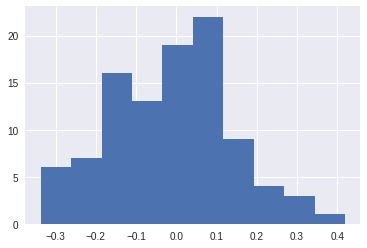

In [21]:
plt.hist(prices)

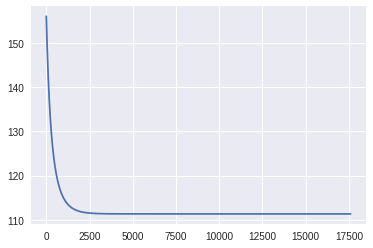

In [22]:
plt.plot(np.asarray(energy_list[:]))

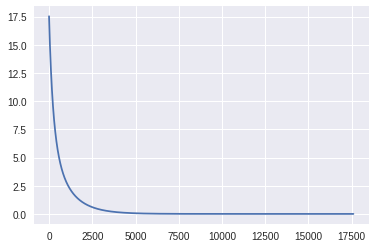

In [23]:
plt.plot(np.asarray(gradient_list[:]))

In [24]:
np.argmin(energy_list)
energy_list[np.argmin(energy_list)] - energy_analytic

-32.533447704752348

In [25]:
np.average(prices)

-0.013696734138138964

In [26]:
print energy_list[-1]
print gradient_list[-1]

111.35992335
9.99805440918e-07


In [27]:
print np.std(prices)**2
print Delta

0.0228168972181
1.0


In [85]:
print energy_list[-1] - energy_analytic

81.8511725159


In [86]:
1./N

0.0033333333333333335

## Print energies

In [339]:
h_mu = xi_matrix.dot(prices) - sigma - budgets

In [340]:
energy = 0.5*np.sum(np.multiply(np.square(h_mu), np.heaviside(h_mu, 0.5)))

In [341]:
print energy

9277267.02021


## Checking energy with analytic calculation 

In [9]:
def jamming_integrand(h,sigma, eta = 0.0):
    ''' Integrand which enters for the computation of the 
        jamming line'''
    den = 1.0/np.sqrt(2*np.pi*(1+eta))
    fun = np.exp(-(h*h)/(2*(1+eta)))
    fac = (h-sigma)**2
    return fun*fac*den

def standard_integrand(h, sigma, eta):
    ''' Integrand for the second integral entering 
        the computation for the UNSAT instability'''
    den = 1.0/np.sqrt(2*np.pi*(1+eta))
    fun = np.exp(-(h*h)/(2*(1+eta)))
    return den*fun

In [10]:
def func_to_solve_UNSAT(chi,m, sigma = 0.0):
    ''' Function to compute the value of '''
    return (1-m**2)*(quad(standard_integrand, -np.inf, chi, args = (chi, sigma))[0]) - quad(jamming_integrand, -np.inf, 
                                                                                            chi, args = (chi, sigma))[0]

def compute_chi(m, sigma = 0.0):
    return newton(func_to_solve_UNSAT, 0.0, args = (m, sigma), maxiter = 500)
#     return brentq(func_to_solve_UNSAT, -4.0, 3.0, args = (m, sigma))
    

def compute_alpha_J(sigma, m, eta = 0.0):
    ''' Computes a particular value on the jamming line 
        for a given value of chi and m'''
    integral = quad(jamming_integrand, -np.inf, sigma, args = (sigma,eta))
    return (1-m**2)/integral[0]    
    
def jamming_line(sigma_range, m, eta = 0.0):
    ''' Computes the jamming line for a range of values of chi'''
    alpha = []
    for sigma in sigma_range:
        integral = quad(jamming_integrand, -np.inf, sigma, args = (sigma, eta))
        alpha.append((1-m**2)/integral[0])
    return np.asarray(alpha)

In [11]:
sigma_range = np.arange(-3,3,0.01)

In [12]:
jline = jamming_line(sigma_range, 0.0)

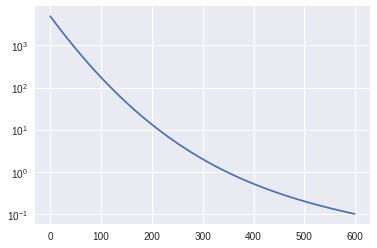

In [13]:
plt.semilogy(jline)

0.13795385533


28.230014500625078

In [127]:
extra_1 = N*p_bar/(np.sqrt(p_bar**2 + Delta))
extra_2 = m*(np.sqrt(alpha/alpha_J) - 1)
print extra_1, extra_2, extra_1*extra_2

50.0 58.3886163299 2919.43081649


In [126]:
extra_2 * N

-50.428165652337995